# Stroke Prediction Dataset Analysis

## Analysis motivation:
Stroke, as per the World Health Organization (WHO), stands as the second most prevalent cause of mortality worldwide, contributing to roughly 11% of all recorded deaths. This dataset serves as a valuable resource for forecasting the likelihood of a patient experiencing a stroke, leveraging a range of input variables encompassing factors such as gender, age, the presence of specific medical conditions, and the individual's smoking status. Each entry in the dataset presents critical insights into the patient's health profile, making it a crucial tool for proactive stroke risk assessment and prevention.

## Objectives:
- Practice working with CSV files.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice using various types of machine learning models.
- Practice building ensembles of machine learning models.
- Practice deploying machine learning models.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries, and filtering data.


## Questions to explore:
- Are people of certain age, gender more likely to have a stroke?
- Does smoking increase the probability of having a stroke?
- Are people with hypertension, heart diseases more likely to have a stroke?

## Biases: 
- The dataset is imbalanced for multiple features, including the target feature. There is less than 5% of patients in the dataset who have had a stroke.
- We don't know whether all of the patients survived the stroke. This information could explain some of the entries (like 'unknown' smoking status).

## Dataset description:
1) **id**: unique identifier
2) **gender**: "Male", "Female" or "Other"
3) **age**: age of the patient
4) **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) **ever_married**: "No" or "Yes"
7) **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) **Residence_type**: "Rural" or "Urban"
9) **avg_glucose_level**: average glucose level in blood
10) **bmi**: body mass index
11) **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) **stroke**: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient


In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
import textwrap
from matplotlib.gridspec import GridSpec
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from scipy.stats import mannwhitneyu
from dython.nominal import associations
from sklearn.feature_selection import mutual_info_classif

import helper_functions as hf

import sqlite3 as sql

sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [3]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv", index_col='id')

<IPython.core.display.Javascript object>

# 1. Exploratory Data Analysis

In [4]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<IPython.core.display.Javascript object>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


<IPython.core.display.Javascript object>

In [6]:
mapping = {'Yes': 1, 'No': 0}

data.age = data.age.astype('int64')
data.hypertension = data.hypertension.astype('object')
data.heart_disease = data.heart_disease.astype('object')
data.ever_married = data.ever_married.replace(mapping).astype('object')
data.stroke = data.stroke.astype('object')

<IPython.core.display.Javascript object>

In [7]:
data.nunique()

gender                  3
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.215264,22.633866,0.00,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


<IPython.core.display.Javascript object>

In [9]:
round(data.describe(exclude = ['float', 'int64']), 2)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Female,0,0,1,Private,Urban,never smoked,0
freq,2994,4612,4834,3353,2925,2596,1892,4861


<IPython.core.display.Javascript object>

## 1.1. Missing values

There are missing values in the BMI column.

<Axes: >

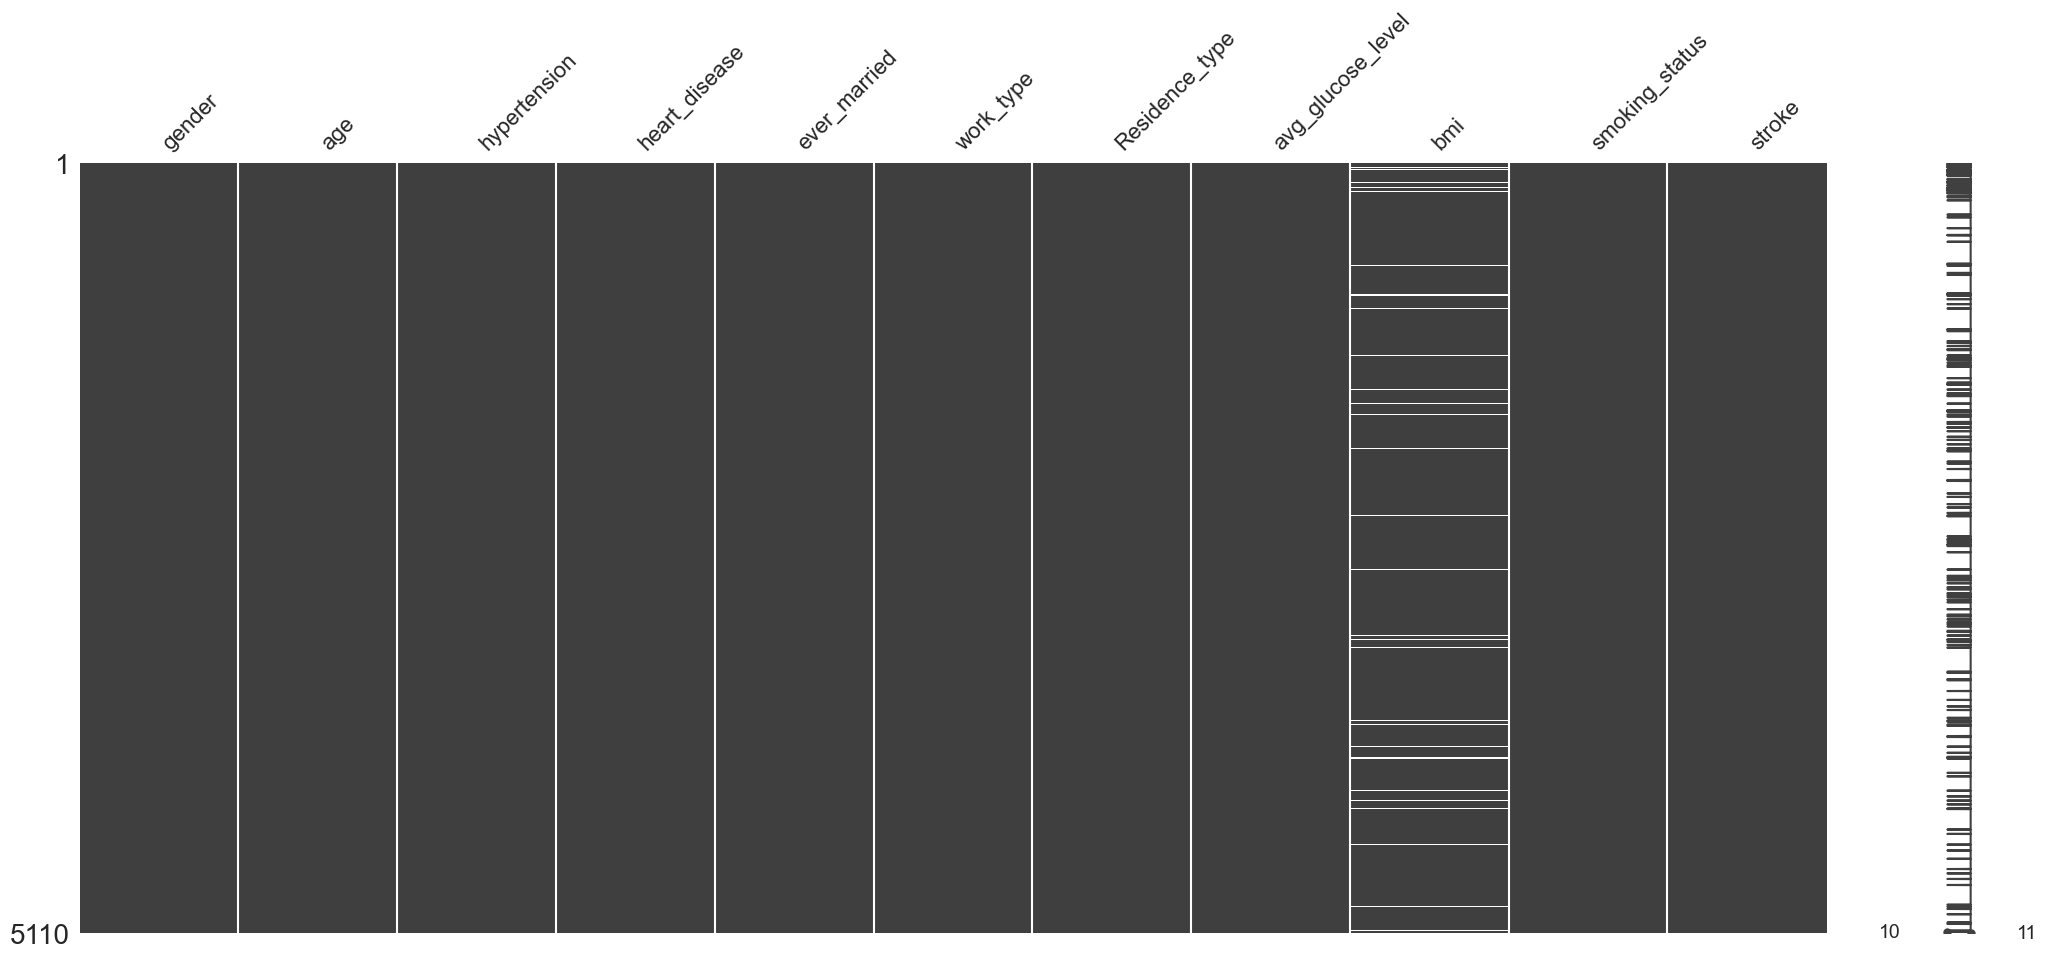

<IPython.core.display.Javascript object>

In [10]:
msno.matrix(data)

In [11]:
data.isna().sum().sort_values(ascending=False)

bmi                  201
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

<IPython.core.display.Javascript object>

Only column 'bmi' has missing values. Let's look into unique features for other columns at places where bmi is NaN:

In [12]:
data[data['bmi'].isna()].nunique()

gender                 2
age                   70
hypertension           2
heart_disease          2
ever_married           2
work_type              4
Residence_type         2
avg_glucose_level    199
bmi                    0
smoking_status         4
stroke                 2
dtype: int64

<IPython.core.display.Javascript object>

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.215264,22.633866,0.00,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


<IPython.core.display.Javascript object>

In [14]:
data[data['bmi'].isna()].describe().T

,count,mean,std,min,25%,50%,75%,max
age,201.0,52.034826,22.309052,0.00,37.00,58.00,71.00,82.00
avg_glucose_level,201.0,126.724627,59.240322,57.52,81.43,99.87,191.79,260.85
bmi,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

It looks like there is no prominent connection between the missing values in the 'bmi' and other features. We will fill missing values with the median for each target group.

In [15]:
data['bmi'] = data['bmi'].fillna(data.groupby('stroke')['bmi'].transform('median'))

<IPython.core.display.Javascript object>

In [16]:
data[data.smoking_status == 'Unknown'].smoking_status.count() / len(data)

0.3021526418786693

<IPython.core.display.Javascript object>

For the "smoking_status" column, there is around 30% of 'Unknown' values. We won't drop these rows since this may be just information people weren't eager to share. 

## 1.2. Duplicate values

There are no duplicate values in this dataset.

In [17]:
len(data) - len(data.drop_duplicates())  

0

<IPython.core.display.Javascript object>

In [18]:
duplicated_df = data[data.duplicated()]
duplicated_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,


<IPython.core.display.Javascript object>

## 1.3. Handling outliers

- The values in numeric columns are in an acceptable range. Features avg_glucose_level and bmi contain statistical outliers. 

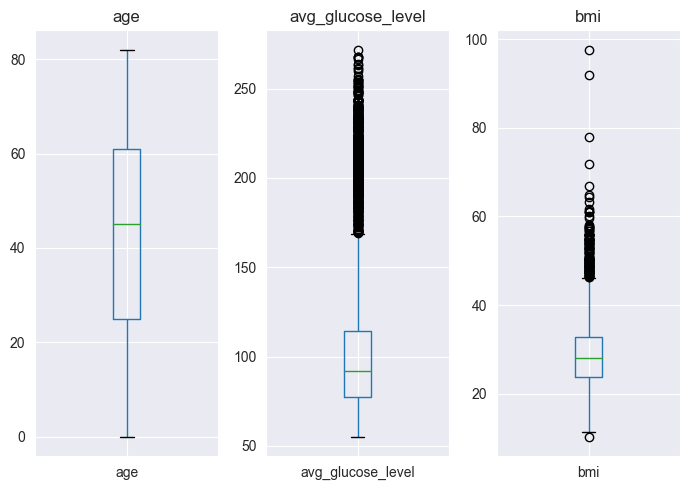

<IPython.core.display.Javascript object>

In [19]:
num_cols = data.select_dtypes(exclude=["object", "bool"]).columns.tolist()
numeric_cols = data[num_cols]

fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols.columns), figsize=(7, 5))

for i, column in enumerate(numeric_cols.columns):
    ax = (
        axes[i] if len(numeric_cols.columns) > 1 else axes
    )
    numeric_cols.boxplot(column=column, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

Based on the information on the Internet, the avg_glucose_level is given in mg/dl and is in plausible range. Regarding BMI, its ranges are also acceptable since it goes up to 100. So, we won't drop these outliers for the EDA part.

Resources used:
- https://www.diabetes.co.uk/diabetes_care/blood-sugar-level-ranges.html
- https://duke-institute.com/2023/03/05/body-mass-index-bmi-is-a-useful-tool-for-measuring-body-fat-based-on-an-individuals-height-and-weight/#:~:text=The%20maximum%20BMI%20value%20is,be%20beneficial%20for%20overall%20health.

## 1.4. Categorical features

#### Main insights and observations:
- Most of the categorical features are imbalanced, especially the target feature (we have less than 5% of stroke cases)
- There's around 30% of 'Unknown' entries for the smoking_status feature. This may be due to patients deciding not to disclose this information. Alternatively, there could be a data entry/storage issue.
- There is only one entry with the non-binary patient. Since this person didn't have a stroke and we don't have enough data on non-binary people, we've dropped this entry.

In [20]:
cat_cols = data.select_dtypes(include=['object', 'category']).columns
cat_df = data[cat_cols]

<IPython.core.display.Javascript object>

In [21]:
for col in cat_df:
    print(f"Unique values for {col}:")
    print(cat_df[col].unique())
    print("-"*20)

Unique values for gender:
['Male' 'Female' 'Other']
--------------------
Unique values for hypertension:
[0 1]
--------------------
Unique values for heart_disease:
[1 0]
--------------------
Unique values for ever_married:
[1 0]
--------------------
Unique values for work_type:
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
--------------------
Unique values for Residence_type:
['Urban' 'Rural']
--------------------
Unique values for smoking_status:
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
--------------------
Unique values for stroke:
[1 0]
--------------------


<IPython.core.display.Javascript object>

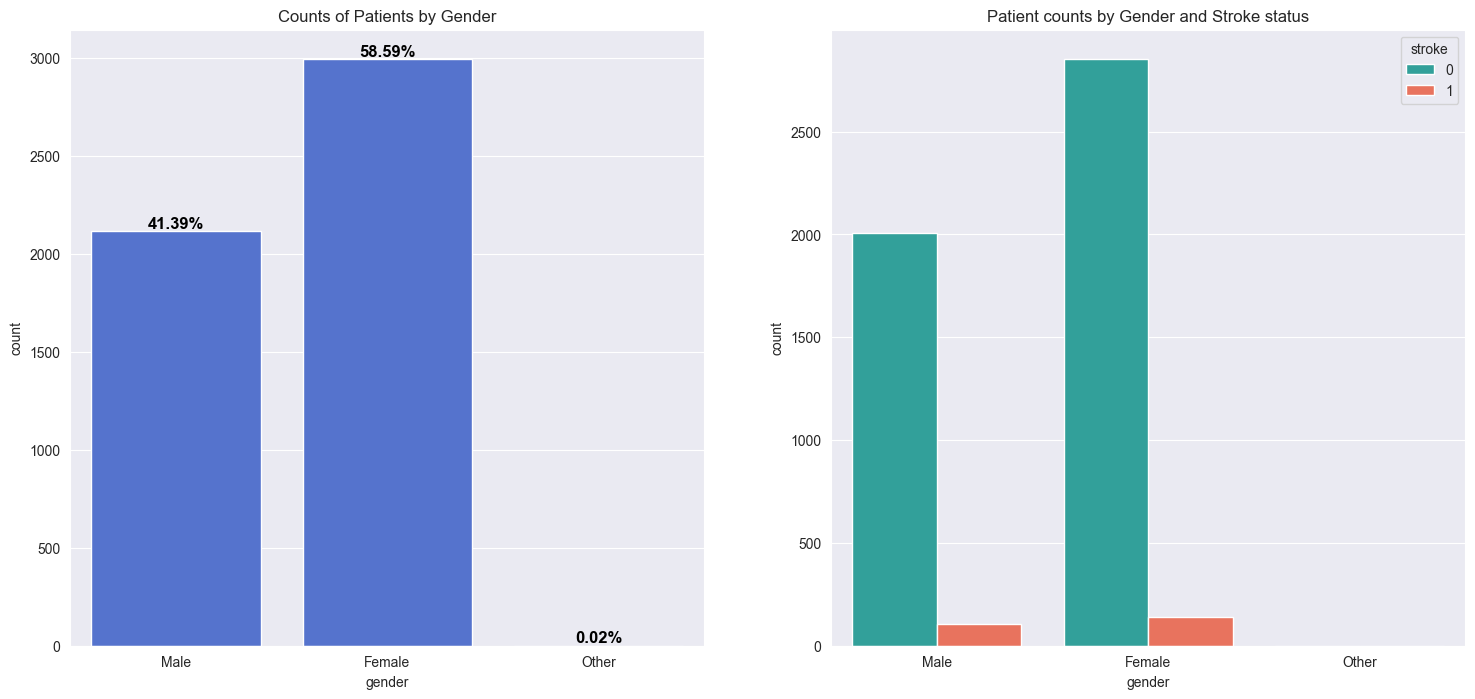

<IPython.core.display.Javascript object>

In [22]:
hf.visualize_double_countplots(data, feature='gender', hue_feature=data['stroke'].astype('str'),
                            plot_1_title='Counts of Patients by Gender',
                            plot_2_title='Patient counts by Gender and Stroke status',
                            x_axis_label_order = None,
                            left_plot_colors = ["royalblue"],
                            hue_feature_order=['0', '1'], hue_colors=["lightseagreen", "tomato"])

In [23]:
data[data.gender == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
56156,Other,26,0,0,0,Private,Rural,143.33,22.4,formerly smoked,0


<IPython.core.display.Javascript object>

We don't have significant amount of cases to represent people of non-binary genders. We will drop this one entry and further recommend collecting more information on non-binary people.

In [24]:
data = data[data['gender'] != "Other"]

<IPython.core.display.Javascript object>

In [25]:
data[['gender', 'stroke']].groupby(['gender']).mean()

,stroke
gender,
Female,0.047094
Male,0.051064


<IPython.core.display.Javascript object>

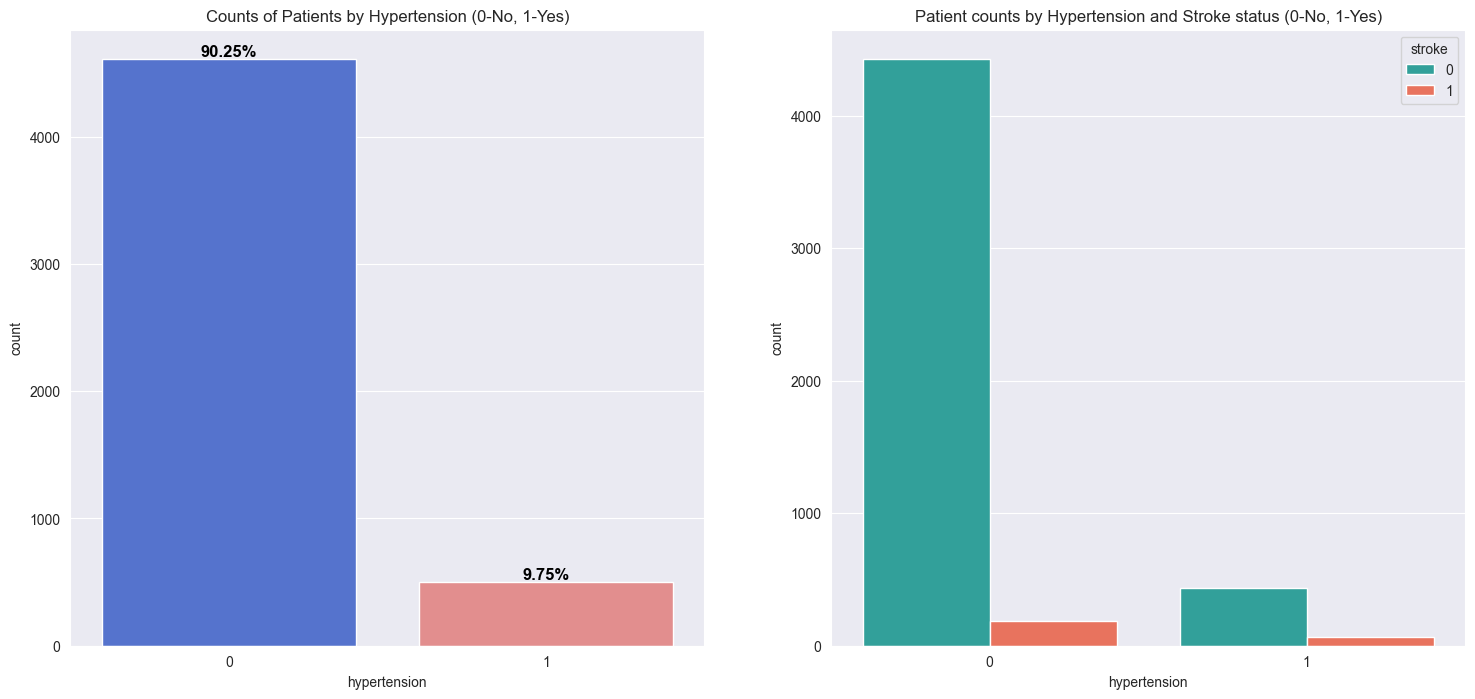

<IPython.core.display.Javascript object>

In [26]:
hf.visualize_double_countplots(data, feature='hypertension', hue_feature=data['stroke'].astype('str'),
                            plot_1_title='Counts of Patients by Hypertension (0-No, 1-Yes)',
                            plot_2_title='Patient counts by Hypertension and Stroke status (0-No, 1-Yes)',
                            x_axis_label_order = [0, 1],
                            left_plot_colors = ["royalblue", "lightcoral"],
                            hue_feature_order=['0', '1'], hue_colors=["lightseagreen", "tomato"])

In [27]:
data[['hypertension', 'stroke']].astype('int').groupby(['hypertension']).mean()

,stroke
hypertension,
0,0.039688
1,0.132530


<IPython.core.display.Javascript object>

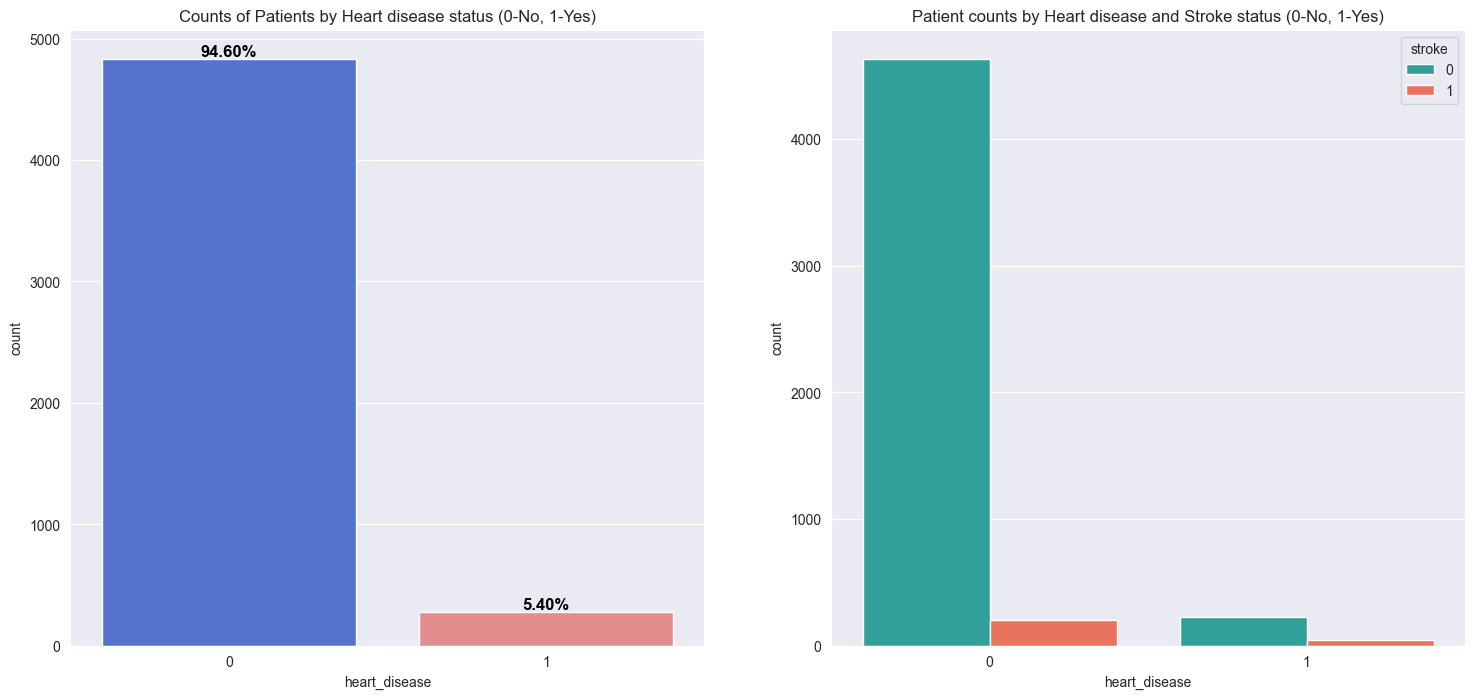

<IPython.core.display.Javascript object>

In [28]:
hf.visualize_double_countplots(data, feature='heart_disease', hue_feature=data['stroke'].astype('str'),
                            plot_1_title='Counts of Patients by Heart disease status (0-No, 1-Yes)',
                            plot_2_title='Patient counts by Heart disease and Stroke status (0-No, 1-Yes)',
                            x_axis_label_order = [0, 1],
                            left_plot_colors = ["royalblue", "lightcoral"],
                            hue_feature_order=['0', '1'], hue_colors=["lightseagreen", "tomato"])

In [29]:
data[['heart_disease', 'stroke']].astype('int').groupby(['heart_disease']).mean()

,stroke
heart_disease,
0,0.041796
1,0.170290


<IPython.core.display.Javascript object>

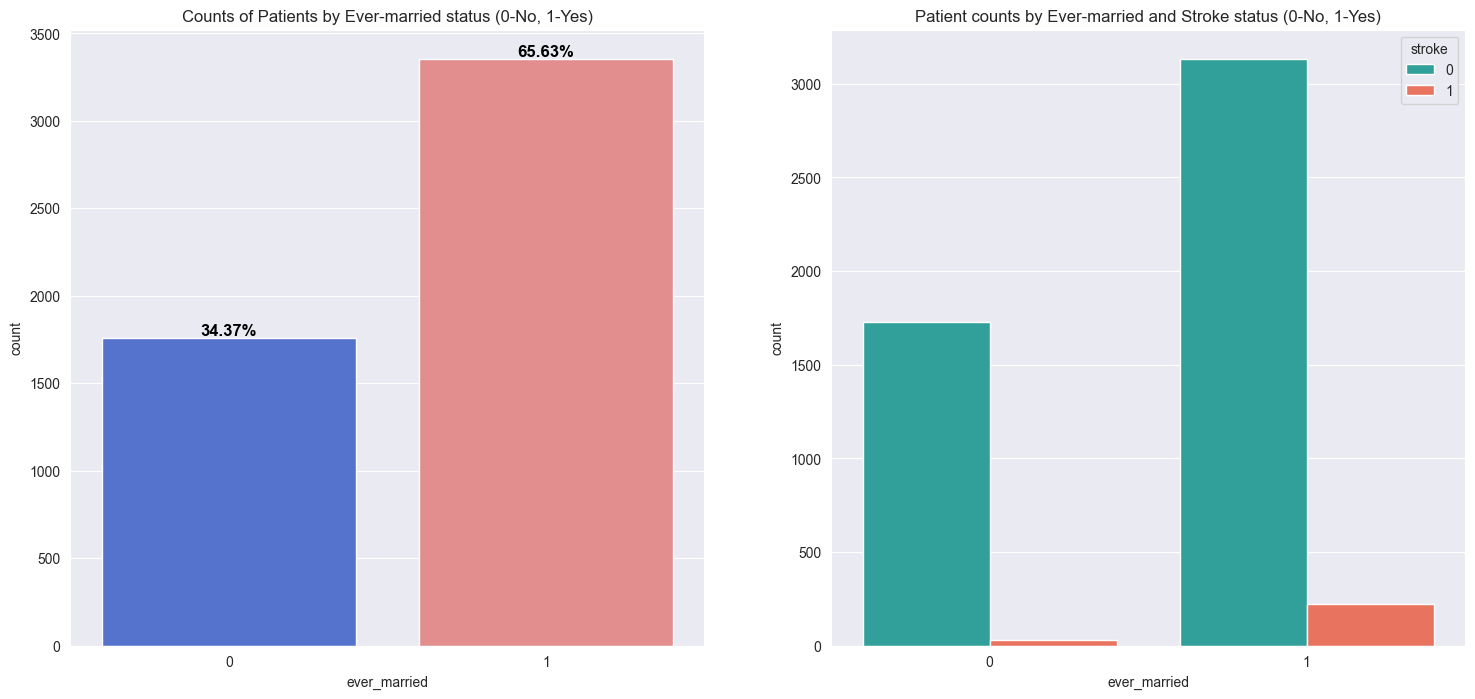

<IPython.core.display.Javascript object>

In [30]:
hf.visualize_double_countplots(data, feature='ever_married', hue_feature=data['stroke'].astype('str'),
                            plot_1_title='Counts of Patients by Ever-married status (0-No, 1-Yes)',
                            plot_2_title='Patient counts by Ever-married and Stroke status (0-No, 1-Yes)',
                            x_axis_label_order = [0, 1],
                            left_plot_colors = ["royalblue", "lightcoral"],
                            hue_feature_order=['0', '1'], hue_colors=["lightseagreen", "tomato"])

In [31]:
data[['ever_married', 'stroke']].astype('int').groupby(['ever_married']).mean()

,stroke
ever_married,
0,0.016515
1,0.065613


<IPython.core.display.Javascript object>

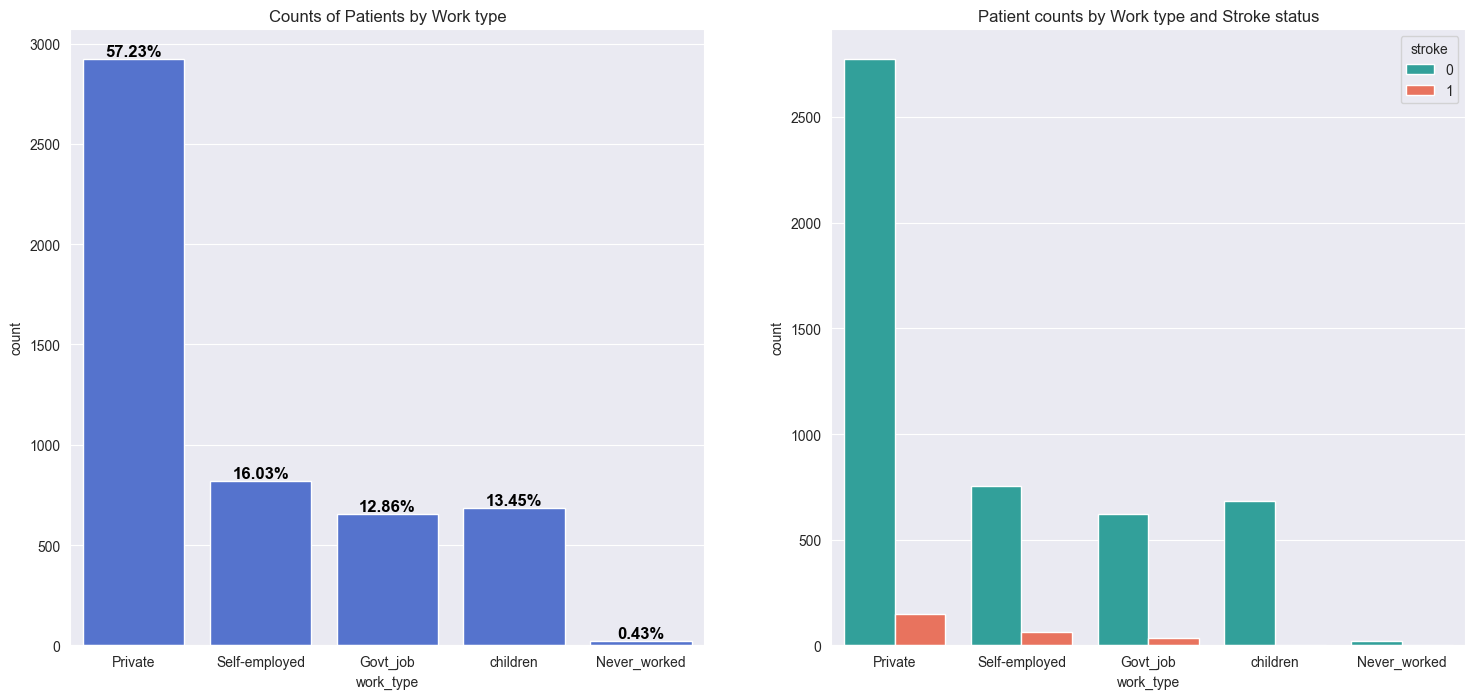

<IPython.core.display.Javascript object>

In [32]:
hf.visualize_double_countplots(data, feature='work_type', hue_feature=data['stroke'].astype('str'),
                            plot_1_title='Counts of Patients by Work type',
                            plot_2_title='Patient counts by Work type and Stroke status',
                            x_axis_label_order = None,
                            left_plot_colors = ["royalblue"],
                            hue_feature_order=['0', '1'], hue_colors=["lightseagreen", "tomato"])

In [33]:
data[data.work_type == 'children'].age.max()

16

<IPython.core.display.Javascript object>

In [34]:
print("Min age:", data[data.work_type == 'Never_worked'].age.min())
print("Max age:", data[data.work_type == 'Never_worked'].age.max())

Min age: 13
Max age: 23


<IPython.core.display.Javascript object>

Some entries with work type never_worked contain children. Since the max age for the category "children" is 16, we will change the work type for all patients 16 and under.

In [35]:
data.loc[data.age < 17, 'work_type'] = 'children'

<IPython.core.display.Javascript object>

We will drop the rest of entries with 'Never_worked' work type.

In [36]:
data = data[data.work_type != 'Never_worked']

<IPython.core.display.Javascript object>

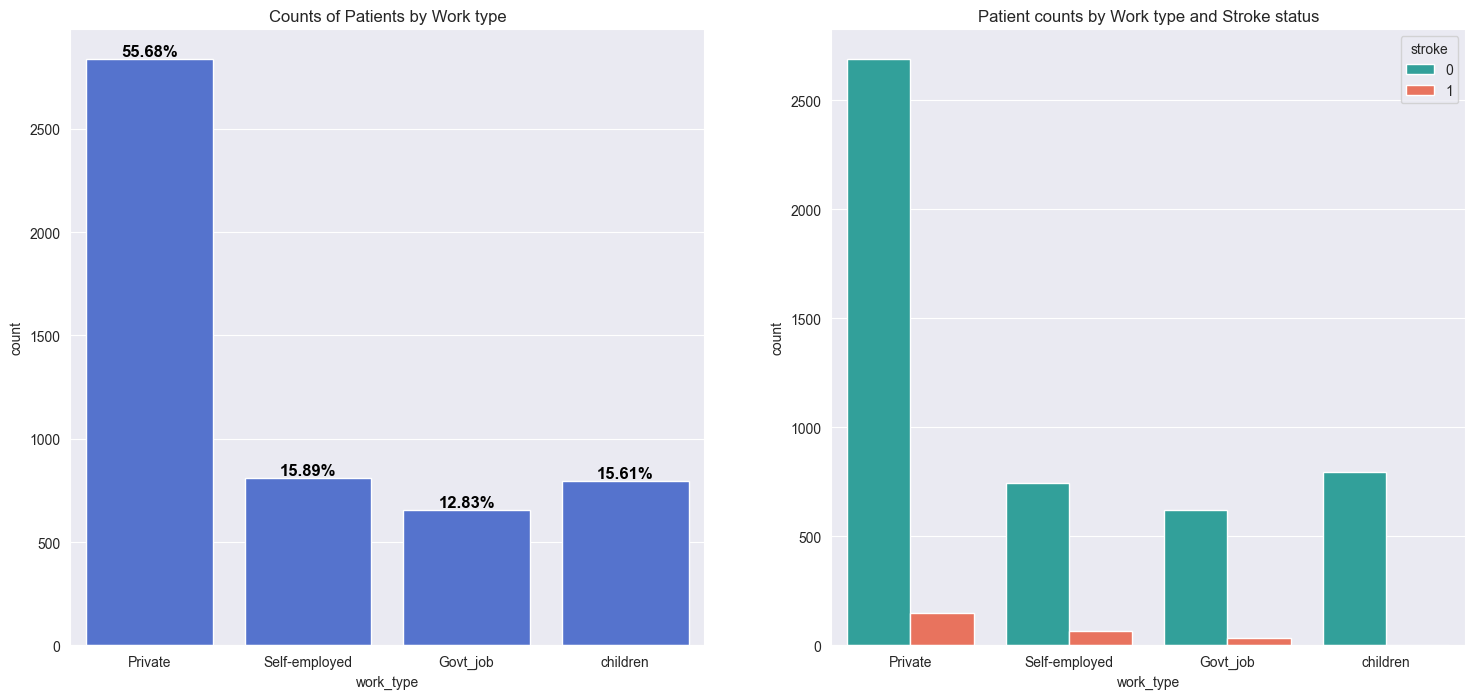

<IPython.core.display.Javascript object>

In [37]:
hf.visualize_double_countplots(data, feature='work_type', hue_feature=data['stroke'].astype('str'),
                            plot_1_title='Counts of Patients by Work type',
                            plot_2_title='Patient counts by Work type and Stroke status',
                            x_axis_label_order = None,
                            left_plot_colors = ["royalblue"],
                            hue_feature_order=['0', '1'], hue_colors=["lightseagreen", "tomato"])

In [38]:
data[['work_type', 'stroke']].groupby(['work_type']).mean()

,stroke
work_type,
Govt_job,0.050459
Private,0.052483
Self-employed,0.080247
children,0.002513


<IPython.core.display.Javascript object>

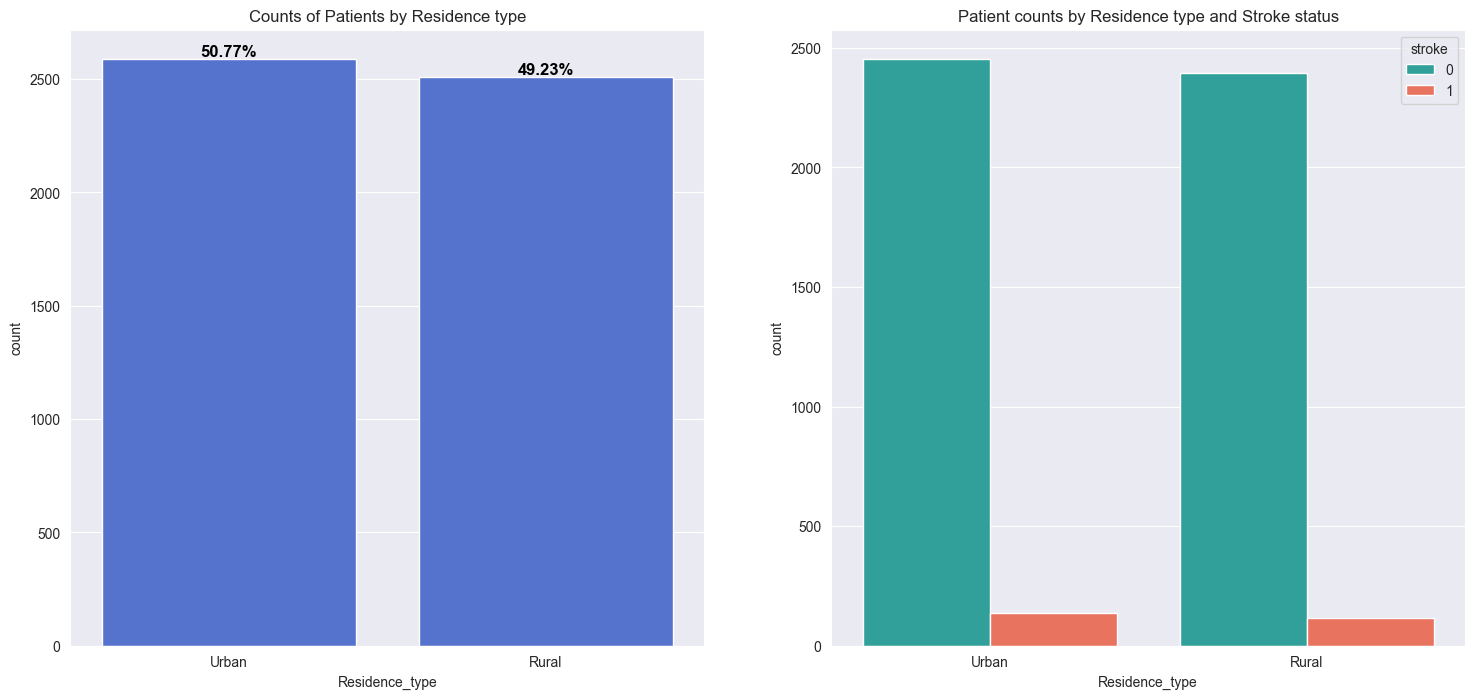

<IPython.core.display.Javascript object>

In [39]:
hf.visualize_double_countplots(data, feature='Residence_type', hue_feature=data['stroke'].astype('str'),
                            plot_1_title='Counts of Patients by Residence type',
                            plot_2_title='Patient counts by Residence type and Stroke status',
                            x_axis_label_order = None,
                            left_plot_colors = ["royalblue"],
                            hue_feature_order=['0', '1'], hue_colors=["lightseagreen", "tomato"])

In [40]:
data[['Residence_type', 'stroke']].groupby(['Residence_type']).mean()

,stroke
Residence_type,
Rural,0.045418
Urban,0.052144


<IPython.core.display.Javascript object>

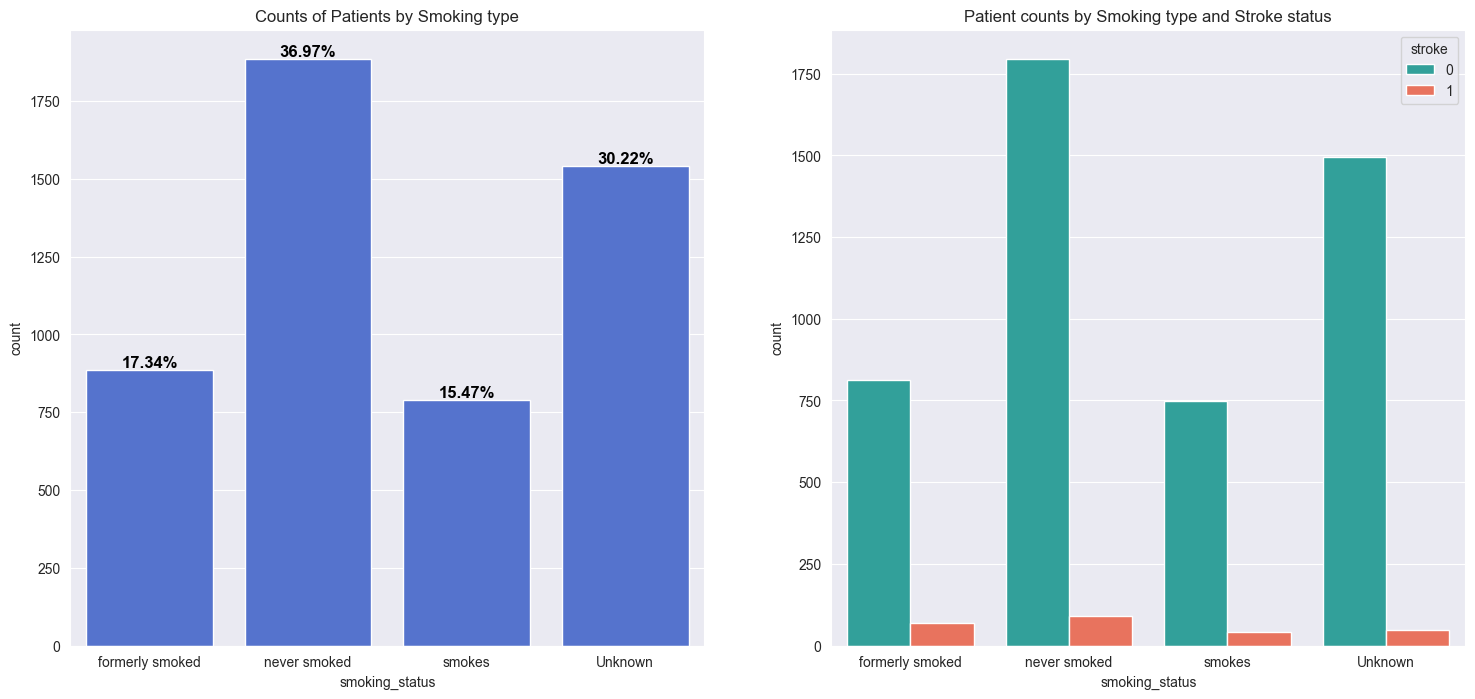

<IPython.core.display.Javascript object>

In [41]:
hf.visualize_double_countplots(data, feature='smoking_status', hue_feature=data['stroke'].astype('str'),
                            plot_1_title='Counts of Patients by Smoking type',
                            plot_2_title='Patient counts by Smoking type and Stroke status',
                            x_axis_label_order = None,
                            left_plot_colors = ["royalblue"],
                            hue_feature_order=['0', '1'], hue_colors=["lightseagreen", "tomato"])

In [42]:
data[['smoking_status', 'stroke']].groupby(['smoking_status']).mean()

,stroke
smoking_status,
Unknown,0.0305
formerly smoked,0.079186
never smoked,0.047745
smokes,0.053232


<IPython.core.display.Javascript object>

<Axes: title={'center': 'Counts of Patients by Stroke cases(0-No, 1-Yes)'}, xlabel='Stroke', ylabel='Count'>

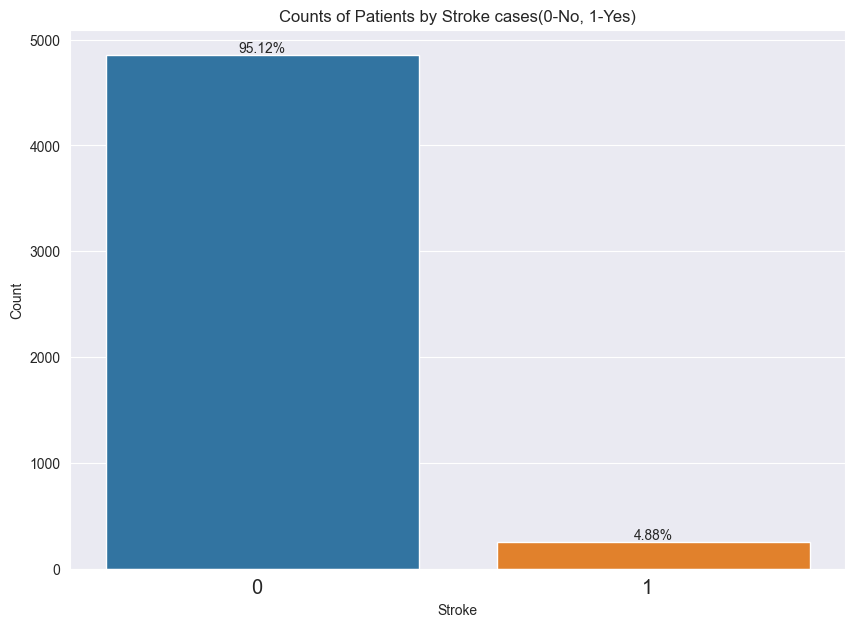

<IPython.core.display.Javascript object>

In [43]:
hf.plot_sns_countplot(data, x='stroke', plot_order=[0, 1],
                      x_label='Stroke', y_label='Count', 
                      title='Counts of Patients by Stroke cases(0-No, 1-Yes)',
                      xtick_rot=0, percentages=True)

## 1.5. Numerical features

#### Main insights and observations:
- The mean and median age and average glucose level are higher for the group of people who have had a stroke. 

In [44]:
num_cols = data.select_dtypes(exclude=['object', 'category']).columns
num_df = data[num_cols]

<IPython.core.display.Javascript object>

In [45]:
num_target_df = num_df.copy()
num_target_df['stroke'] = data['stroke']

<IPython.core.display.Javascript object>

In [46]:
num_target_df.groupby('stroke').mean()

,age,avg_glucose_level,bmi
stroke,,,
0,42.012165,104.809981,28.800124
1,67.726908,132.544739,30.347390


<IPython.core.display.Javascript object>

In [47]:
num_target_df.groupby('stroke').median()

,age,avg_glucose_level,bmi
stroke,,,
0,43.0,91.50,28.0
1,71.0,105.22,29.7


<IPython.core.display.Javascript object>

#### Age distribution

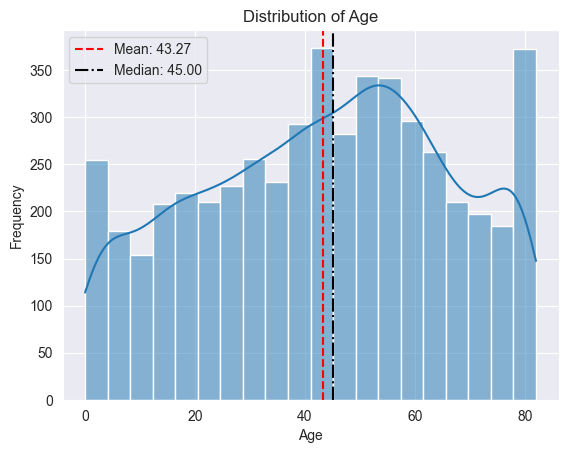

<IPython.core.display.Javascript object>

In [48]:
sns.histplot(data=num_target_df, x='age', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
mean_value = num_target_df['age'].mean()
median_value = num_target_df['age'].median()
plt.axvline(x=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(x=median_value, color='black', linestyle='-.', label=f'Median: {median_value:.2f}')
plt.legend()
plt.show()

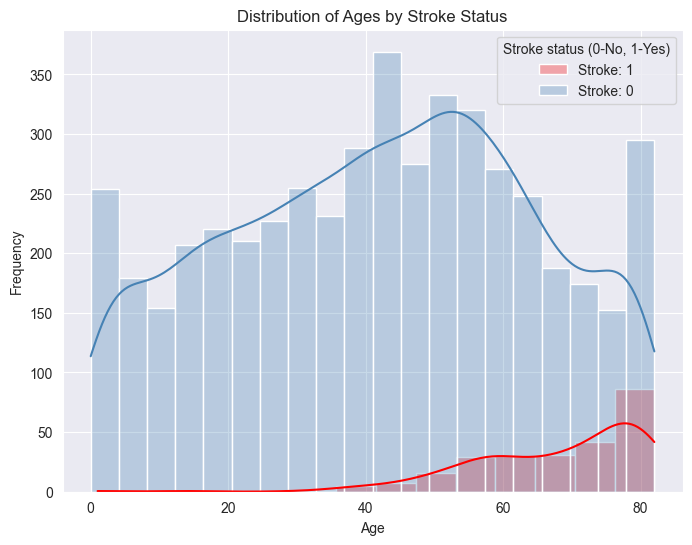

<IPython.core.display.Javascript object>

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))

for category in num_target_df['stroke'].unique():
    if category == 0:
        my_color = 'steelblue'
    else:
        my_color = 'red' 
    sns.histplot(data=num_target_df[num_target_df['stroke'] == category], 
                 x='age', label=f'Stroke: {category}', kde=True, ax=ax,
                 color=my_color, alpha=0.3)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages by Stroke Status')
plt.legend(title='Stroke status (0-No, 1-Yes)')
plt.show()

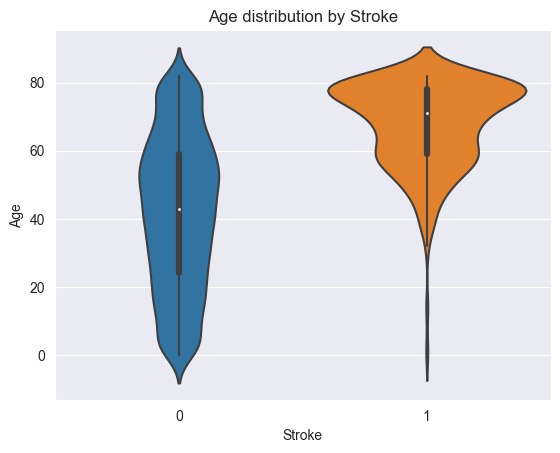

<IPython.core.display.Javascript object>

In [50]:
hf.visualize_violinplot(num_target_df, 'stroke', 'age')

#### Average glucose level distribution

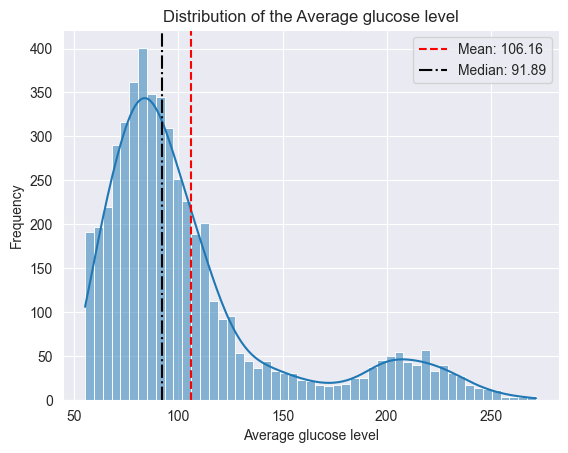

<IPython.core.display.Javascript object>

In [51]:
sns.histplot(data=num_target_df, x='avg_glucose_level', kde=True)
plt.xlabel('Average glucose level')
plt.ylabel('Frequency')
plt.title('Distribution of the Average glucose level')
mean_value = num_target_df['avg_glucose_level'].mean()
median_value = num_target_df['avg_glucose_level'].median()
plt.axvline(x=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(x=median_value, color='black', linestyle='-.', label=f'Median: {median_value:.2f}')
plt.legend()
plt.show()

The distribution of the average glucose levels is right skewed and is appearing to be bimodal with the second peak at very high glucose levels.

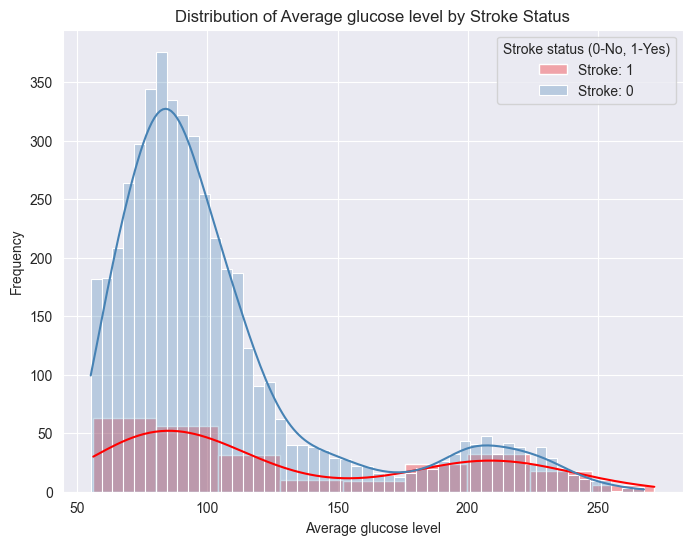

<IPython.core.display.Javascript object>

In [52]:
fig, ax = plt.subplots(figsize=(8, 6))

for category in num_target_df['stroke'].unique():
    if category == 0:
        my_color = 'steelblue'
    else:
        my_color = 'red' 
    sns.histplot(data=num_target_df[num_target_df['stroke'] == category], 
                 x='avg_glucose_level', label=f'Stroke: {category}', kde=True, ax=ax,
                 color=my_color, alpha=0.3)

plt.xlabel('Average glucose level')
plt.ylabel('Frequency')
plt.title('Distribution of Average glucose level by Stroke Status')
plt.legend(title='Stroke status (0-No, 1-Yes)')
plt.show()

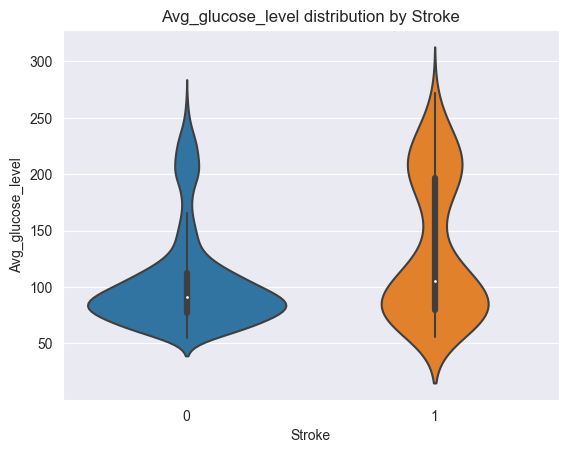

<IPython.core.display.Javascript object>

In [53]:
hf.visualize_violinplot(num_target_df, 'stroke', 'avg_glucose_level')

#### BMI distribution

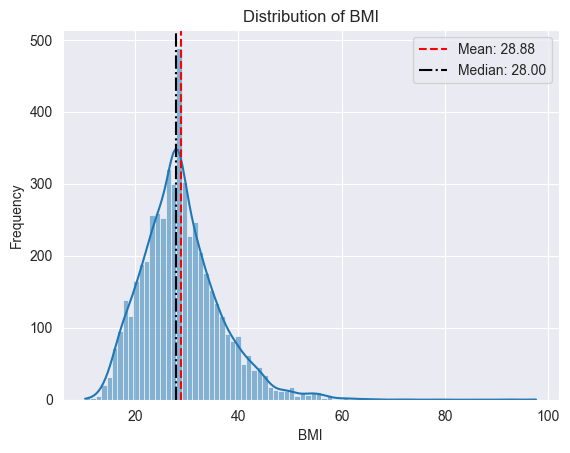

<IPython.core.display.Javascript object>

In [54]:
sns.histplot(data=num_target_df, x='bmi', kde=True)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
mean_value = num_target_df['bmi'].mean()
median_value = num_target_df['bmi'].median()
plt.axvline(x=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(x=median_value, color='black', linestyle='-.', label=f'Median: {median_value:.2f}')
plt.legend()
plt.show()

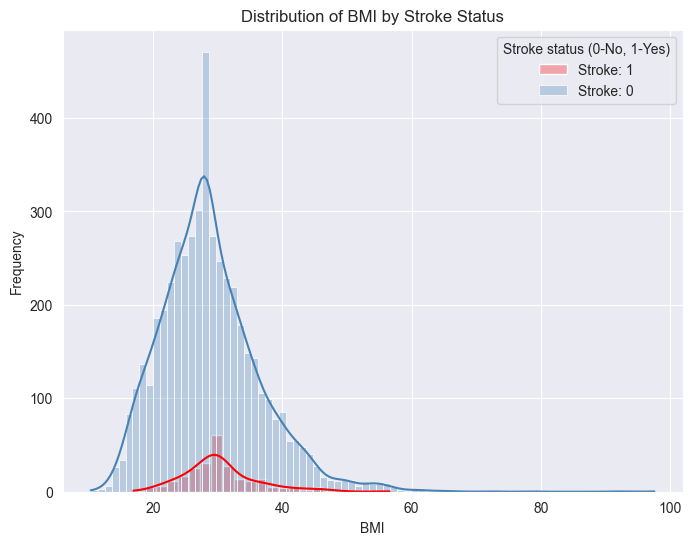

<IPython.core.display.Javascript object>

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))

for category in num_target_df['stroke'].unique():
    if category == 0:
        my_color = 'steelblue'
    else:
        my_color = 'red' 
    sns.histplot(data=num_target_df[num_target_df['stroke'] == category], 
                 x='bmi', label=f'Stroke: {category}', kde=True, ax=ax,
                 color=my_color, alpha=0.3)

plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI by Stroke Status')
plt.legend(title='Stroke status (0-No, 1-Yes)')
plt.show()

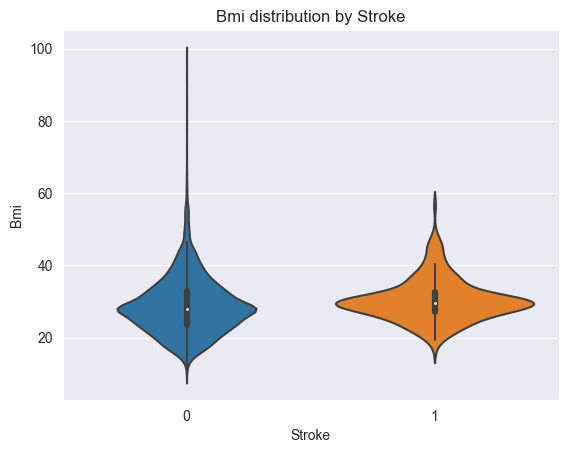

<IPython.core.display.Javascript object>

In [56]:
hf.visualize_violinplot(num_target_df, 'stroke', 'bmi')

### 1.5.1. Binning Numerical Features

We will create new categorical features by binning numerical features "age", "bmi", "avg_glucose_level". 

In [57]:
data['age_group'] = pd.cut(data['age'], bins=[0, 10, 16, 25, 45, 65, 130], 
                           labels=['0-10', '11-16', '17-25', '26-45',
                                   '46-65', '66+'], 
                           include_lowest=True)

<IPython.core.display.Javascript object>

In [58]:
data['bmi_group'] = pd.cut(data['bmi'], bins=[0, 16.5, 18.5, 24.9,
                                              29.9, 34.9, 39.9, 100],
                           labels=['severely_underweight', 'underweight',
                                   'normal', 'overweight', 'obesity_class1',
                                   'obesity_class2', 'obesity_class3'],
                           include_lowest=True)

<IPython.core.display.Javascript object>

In [59]:
data['avg_glucose_group'] = pd.cut(data['avg_glucose_level'],
                                   bins=5)
data['avg_glucose_group'] = data['avg_glucose_group'].apply(lambda x: int(x.left))

<IPython.core.display.Javascript object>

In [60]:
data['avg_glucose_group'] = pd.cut(data['avg_glucose_level'].astype("int"), 
                                   bins=[i for i in range(0,301,50)], 
                                   labels=["<50", "51-100", "101-150",
                                           "151-200", "201-250", "251+"],
                                   include_lowest=True)

<IPython.core.display.Javascript object>

## 1.6. Correlations and Associations

#### Main insights and observations:
- There's a moderate correlation between age and bmi.
- There is a moderate association between smoking_status and ever_married status, and between smoking_status and work_type.
- There's an asymetric association between work type and ever-married status. Whenever in the dataset the work type is children, the ever-married status will be 0.
- There is a significant share of Unknown smoking status among children. This may contribute to the association between the work type and the smoking status.
- The mutual information scores are not very high for any of the features.
- The new features created by binning the numerical columns don't have higher MI scores than the original features.
- The top MI scores have features 'age'(and 'age_group'), 'avg_glucose_level' and 'bmi', which are the only three numerical features in the dataset.

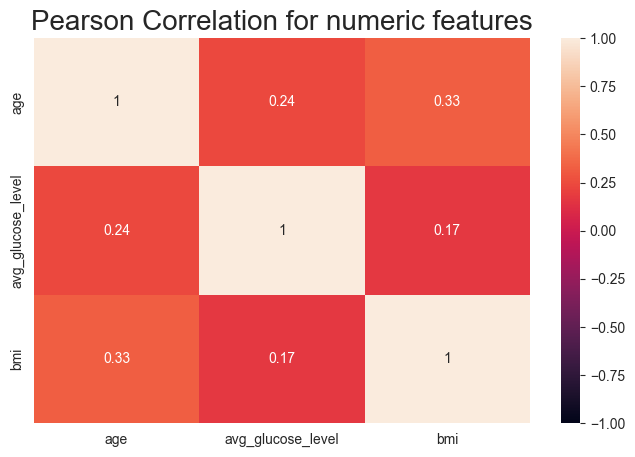

<IPython.core.display.Javascript object>

In [61]:
plt.figure(figsize=(8, 5))
plt.title("Pearson Correlation for numeric features", fontsize=20)
ax = sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1)

- There's a moderate correlation between age and bmi.

#### Theil's U and Cramer's V Association scores for nominal categorical features

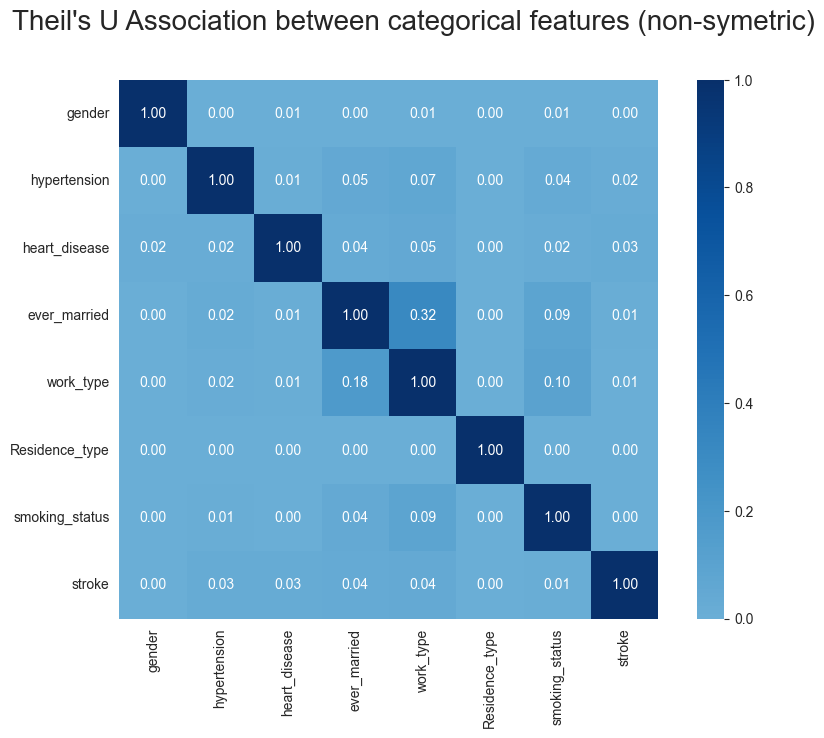

<IPython.core.display.Javascript object>

In [62]:
fig, ax = plt.subplots(figsize = (10, 7))
fig.suptitle("Theil's U Association between categorical features (non-symetric)", fontsize=20)

theils_u = associations(data[cat_cols],
             nom_nom_assoc = 'theil',
             ax = ax,
             cmap = "Blues")

- There's a moderate asymetric association between 'ever-married' and 'work_type'

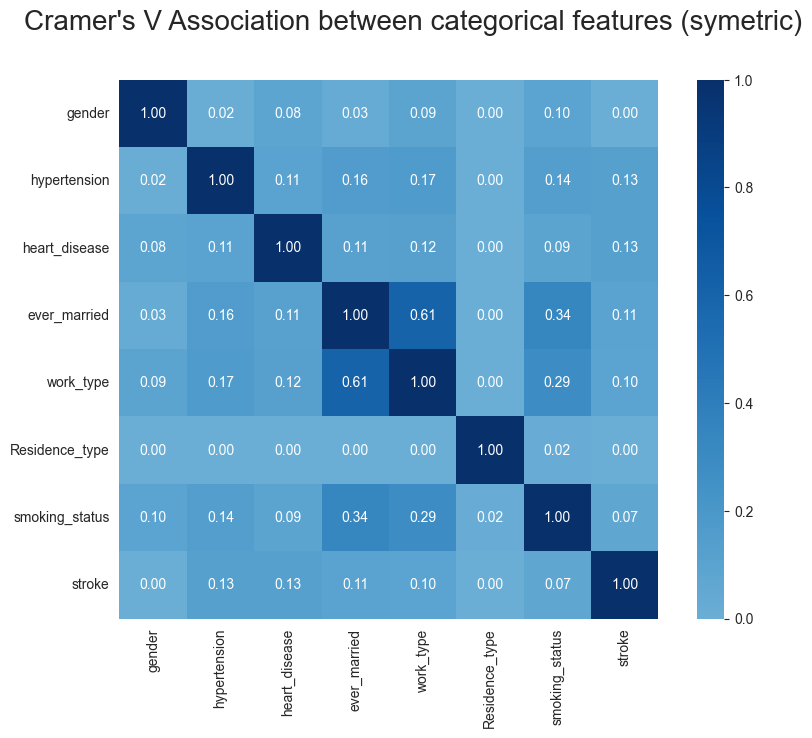

<IPython.core.display.Javascript object>

In [63]:
fig, ax = plt.subplots(figsize = (10, 7))
fig.suptitle("Cramer's V Association between categorical features (symetric)", fontsize=20)

cramers_v = associations(data[cat_cols],
             nom_nom_assoc = 'cramer',
             ax = ax,
             cmap = "Blues")

- There is a moderate symetric association between smoking_status and ever_married status, and between smoking_status and work_type.

Let's look into correlation pairs more in detail:

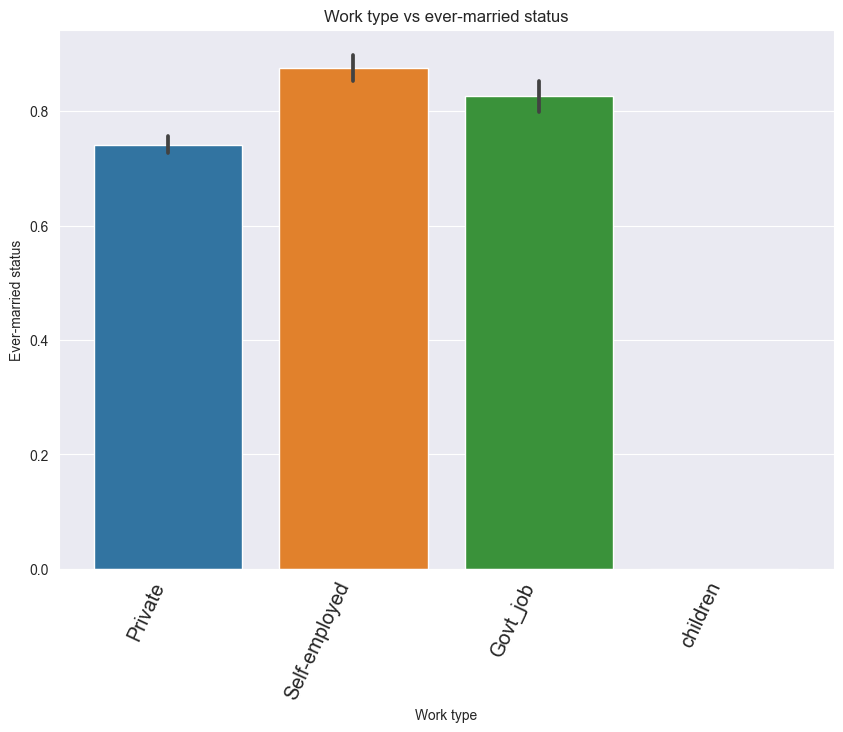

<IPython.core.display.Javascript object>

In [64]:
hf.plot_sns_barplot(data, x='work_type', y='ever_married',
                    x_label='Work type', y_label='Ever-married status',
                    title='Work type vs ever-married status')

- There's an asymetric association between work type and ever-married status. Since one of the work type categories is children, it's reasonable to assume that they were never married. We can see that whenever in the dataset the work type is children, the ever-married status will be 0.

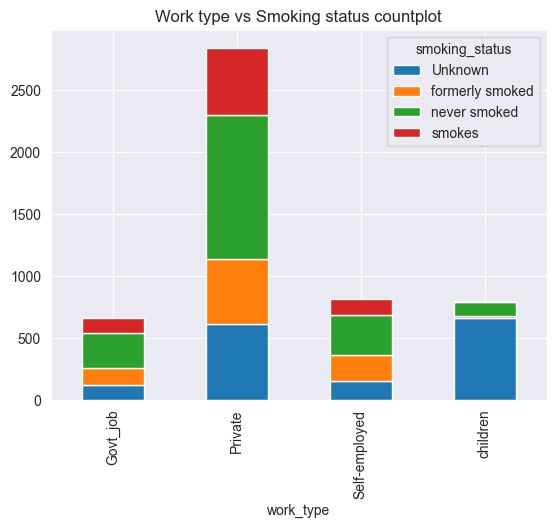

<IPython.core.display.Javascript object>

In [65]:
cross_tab = pd.crosstab(data['work_type'], data['smoking_status'])
cross_tab.plot(kind='bar', stacked=True)
plt.title("Work type vs Smoking status countplot")
plt.show()

- We can observe that there is a significant share of Unknown smoking status among children. We may assume that the parents were filling out the forms and didn't know the answer to this question, or the children were unwilling to share this information. Alternatively, there could be also a part of deceased people in the dataset, who didn't survive the stroke and the information was collected afterwards from the relatives, which could explain the Unknown smoking status.  

#### Mutual Info 

In [66]:
map_glucose = {
    '<50': 0,
    '51-100': 0,
    '101-150': 1,
    '151-200': 2,
    '201-250': 3,
    '251+': 4
}

map_age = {
    '0-10': 0,
    '11-16': 1,
    '17-25': 2,
    '26-45': 3,
    '46-65': 4,
    '66+': 5
}

map_bmi = {
    'severely_underweight': 0,
    'underweight': 1,
    'normal': 2,
    'overweight': 3,
    'obesity_class1': 4,
    'obesity_class2': 5,
    'obesity_class3': 6
}

<IPython.core.display.Javascript object>

In [67]:
X_mi = data.copy()
y_mi = X_mi.pop("stroke")

nom_cat = [i for i in cat_cols if i != 'stroke']

X_dummies = pd.get_dummies(X_mi[nom_cat], drop_first=True)
X_mi.drop(columns=nom_cat, inplace=True)
X_mi = pd.concat([X_mi, X_dummies], axis=1)

X_mi['age_group'] = X_mi['age_group'].replace(map_age).astype('int')
X_mi['bmi_group'] = X_mi['bmi_group'].replace(map_bmi).astype('int')
X_mi['avg_glucose_group'] = X_mi['avg_glucose_group'].replace(map_glucose).astype('int')

X_mi[num_cols] = X_mi[num_cols].astype('int')
y_mi = y_mi.astype(int)

discrete_features = X_mi.dtypes == int

<IPython.core.display.Javascript object>

In [68]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_mi, y_mi, discrete_features)
print(mi_scores)

age                               0.044200
age_group                         0.034591
avg_glucose_level                 0.028610
bmi                               0.014751
ever_married_1                    0.010664
heart_disease_1                   0.008645
avg_glucose_group                 0.007863
bmi_group                         0.005661
work_type_children                0.003515
work_type_Private                 0.003086
smoking_status_never smoked       0.002130
hypertension_1                    0.000933
gender_Male                       0.000000
work_type_Self-employed           0.000000
Residence_type_Urban              0.000000
smoking_status_formerly smoked    0.000000
smoking_status_smokes             0.000000
Name: MI Scores, dtype: float64


<IPython.core.display.Javascript object>

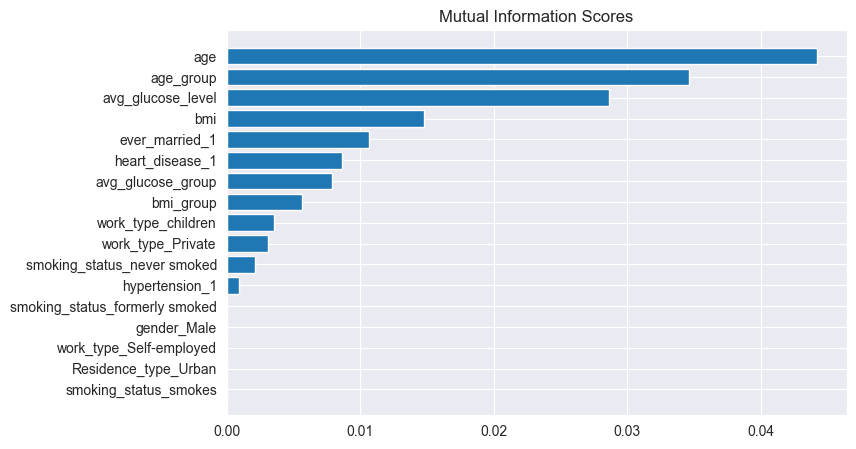

<IPython.core.display.Javascript object>

In [69]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

- The mutual information scores are not very high for any of the features.
- The new features created by binning the numerical columns don't have higher MI scores than the original features, so we will consider removing the binned columns.
- Among the features, the top MI scores have columns 'age'(and 'age_group'), 'avg_glucose_level' and bmi. 

# 2. Statistical Inference

Main insights and observations:
- There is a significant association between the Stroke status and hypertension status/heart disease/ever-married status/work type/smoking status/age group/bmi group/avg glucose group.
- There is a significant difference between the median age, bmi, and avg glucose level of people who have had a stroke.
- The 95% confidence interval for people who had a stroke are:
    - Age: 66-69y.o.
    - BMI: 29.6-31
    - Avg glucose level: 124.8-140.2 mg/dL

## 2.1. Hypothesis Testing -  Is there a significant association between the categorical features and Stroke status (target variable)?

In [70]:
cat_l = data.select_dtypes(include=['object', 'category']).columns.tolist()
cat_l.remove('stroke')

<IPython.core.display.Javascript object>

In [71]:
for col in cat_l:
    print(col)
    print("_"*20)
    print(hf.chi_square_test(data, col, 'stroke'))
    print("-"*50)

gender
____________________
{'Chi-Square Statistic': 0.3389809085527803, 'P-value': 0.5604180522554214, 'Degrees of Freedom': 1, 'Expected Frequencies Table': array([[2842.08668366,  145.91331634],
       [2007.91331634,  103.08668366]]), 'Significance Level (alpha)': 0.05, 'Hypothesis Test Result': 'Fail to reject the null hypothesis: There is no significant association between the two features.'}
--------------------------------------------------
hypertension
____________________
{'Chi-Square Statistic': 81.25096997289387, 'P-value': 1.987979946628068e-19, 'Degrees of Freedom': 1, 'Expected Frequencies Table': array([[4376.31888606,  224.68111394],
       [ 473.68111394,   24.31888606]]), 'Significance Level (alpha)': 0.05, 'Hypothesis Test Result': 'Reject the null hypothesis: There is a significant association between the two features.'}
--------------------------------------------------
heart_disease
____________________
{'Chi-Square Statistic': 89.9282233400782, 'P-value': 2.4695

<IPython.core.display.Javascript object>

- There is a significant association between the Stroke status and hypertension status/heart disease/ever-married status/work type/smoking status/age group/bmi group/avg glucose group.

## 2.2. Hypothesis Testing - Is the median age, bmi and avg glucose level of people who had stroke significantly different from those who haven't?

- H0: There is no significant difference.
- H1: The median age is significantly different among people who had stroke.
- Conclusions: There is a significant difference between the median age, bmi, and avg glucose level of people who have had a stroke.

In [72]:
data[['age', 'stroke']].groupby('stroke').median()

,age
stroke,
0,43.0
1,71.0


<IPython.core.display.Javascript object>

In [73]:
data[['bmi', 'stroke']].groupby('stroke').median()

,bmi
stroke,
0,28.0
1,29.7


<IPython.core.display.Javascript object>

In [74]:
data[['avg_glucose_level', 'stroke']].groupby('stroke').median()

,avg_glucose_level
stroke,
0,91.50
1,105.22


<IPython.core.display.Javascript object>

In [75]:
stroke = data[data['stroke'] == 1]
no_stroke = data[data['stroke'] == 0]

<IPython.core.display.Javascript object>

Results of the tests for assumptions for 2-sample t-tests for groups in age:
----------------------------------------------------------------------
Shapiro-Wilk Test - Group 1: Statistic = 0.8777768015861511 P-value = 3.0195735235133414e-13
Shapiro-Wilk Test - Group 2: Statistic = 0.9709616303443909 P-value = 2.8760573897952976e-30
Levene's Test - P-value = 1.546585778355896e-29
One or both groups may not meet the assumptions for the t-test.
--------------------------------------------------
D'Agostino and Pearson's omnibus Test for Normality - Group 1: Statistic = 72.35796784503651 P-value = 1.9393979025364776e-16
D'Agostino and Pearson's omnibus Test for Normality - Group 2: Statistic = 929.902675726625 P-value = 1.1863138819263435e-202
One or both groups may not be normally distributed.
--------------------------------------------------


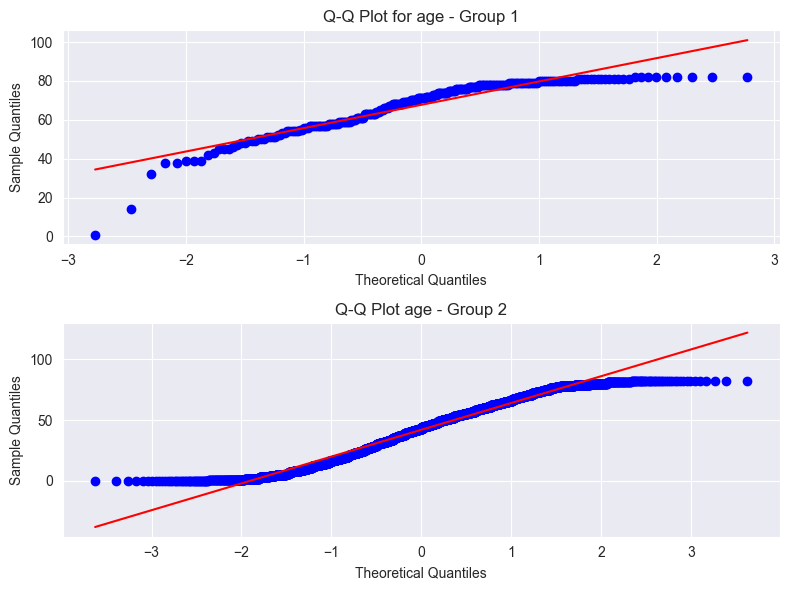

Results of the tests for assumptions for 2-sample t-tests for groups in bmi:
----------------------------------------------------------------------
Shapiro-Wilk Test - Group 1: Statistic = 0.9361259341239929 P-value = 6.349182068987602e-09
Shapiro-Wilk Test - Group 2: Statistic = 0.9502528309822083 P-value = 1.0152418584421014e-37
Levene's Test - P-value = 2.2801784597261404e-07
One or both groups may not meet the assumptions for the t-test.
--------------------------------------------------
D'Agostino and Pearson's omnibus Test for Normality - Group 1: Statistic = 48.5205342263079 P-value = 2.9100460615822578e-11
D'Agostino and Pearson's omnibus Test for Normality - Group 2: Statistic = 1073.6063674814661 P-value = 7.401835573129682e-234
One or both groups may not be normally distributed.
--------------------------------------------------


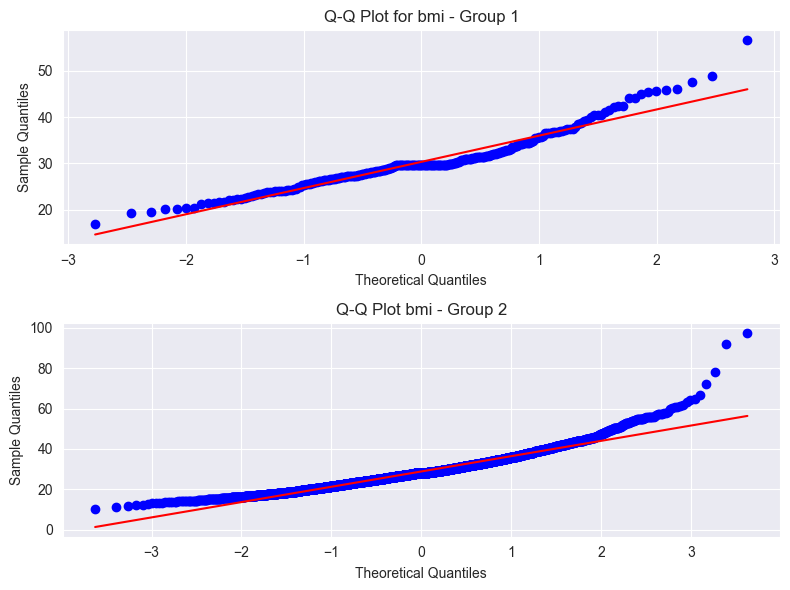

Results of the tests for assumptions for 2-sample t-tests for groups in avg_glucose_level:
----------------------------------------------------------------------
Shapiro-Wilk Test - Group 1: Statistic = 0.8712369203567505 P-value = 1.232048588584861e-13
Shapiro-Wilk Test - Group 2: Statistic = 0.8035210371017456 P-value = 0.0
Levene's Test - P-value = 5.333388578949266e-22
One or both groups may not meet the assumptions for the t-test.
--------------------------------------------------
D'Agostino and Pearson's omnibus Test for Normality - Group 1: Statistic = 157.0928367602181 P-value = 7.721895574868484e-35
D'Agostino and Pearson's omnibus Test for Normality - Group 2: Statistic = 1360.5902321647563 P-value = 3.561106972492993e-296
One or both groups may not be normally distributed.
--------------------------------------------------


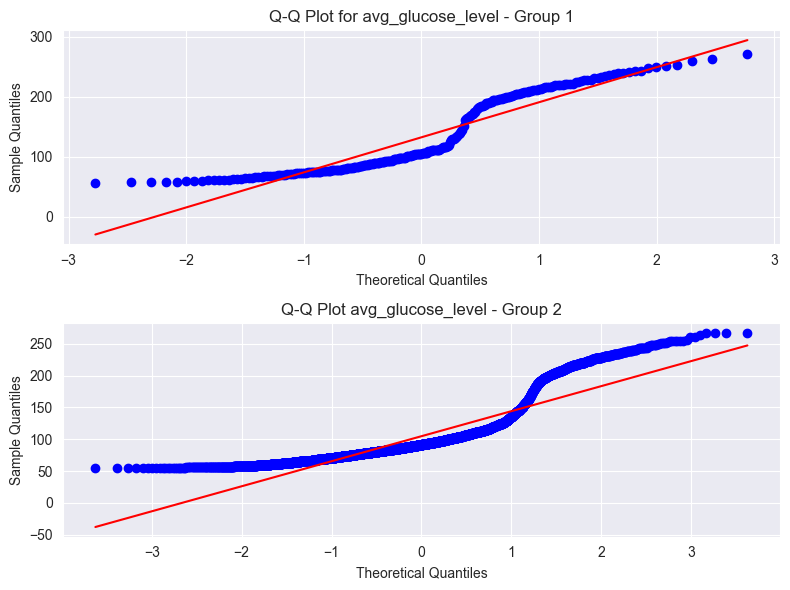

<IPython.core.display.Javascript object>

In [76]:
for col in ['age', 'bmi', 'avg_glucose_level']:
    hf.test_two_sample_ttest_assumptions(stroke, no_stroke, col)

In [77]:
for col in ['age', 'bmi', 'avg_glucose_level']:
    U_statistic, p_value = mannwhitneyu(stroke[col], 
                                        no_stroke[col], 
                                        alternative='two-sided')
    alpha = 0.05
    if p_value < alpha:
        print(f"Reject the null hypothesis: There is a significant difference in {col} medians between the two groups.")
    else:
        print(f"Fail to reject the null hypothesis: There is no significant difference in {col} medians between the two groups.")
    print("-"*50)

Reject the null hypothesis: There is a significant difference in age medians between the two groups.
--------------------------------------------------
Reject the null hypothesis: There is a significant difference in bmi medians between the two groups.
--------------------------------------------------
Reject the null hypothesis: There is a significant difference in avg_glucose_level medians between the two groups.
--------------------------------------------------


<IPython.core.display.Javascript object>

## 2.3. Hypothesis Testing - Does smoking increase the likelihood of getting a stroke?

- H0: There is no significant association between having a stroke and being a current or former smoker.
- H1: There is a significant association between these two features.
- Conclusions: Smokers indeed have a higher likelihood of having a stroke.
- Note: We have counted 'Unknown' smoking status as non-smokers, but in reality some of the unknowns could be smokers and thus the likelihood of having a stroke for a smoker would increase even more. 

In [78]:
smoker_stroke = data[['smoking_status', 'stroke']]
smoker_stroke['smoking_status'].replace({'formerly smoked': 1,
                                         'smokes': 1,
                                         'never smoked': 0,
                                         'Unknown': 0}, inplace=True)
smoker_stroke.groupby('stroke').mean()

,smoking_status
stroke,
0,0.321856
1,0.449799


<IPython.core.display.Javascript object>

In [79]:
hf.chi_square_test(smoker_stroke, 'smoking_status', 'stroke')

{'Chi-Square Statistic': 17.010918750616824,
 'P-value': 3.7165479573301454e-05,
 'Degrees of Freedom': 1,
 'Expected Frequencies Table': array([[3258.69778388,  167.30221612],
        [1591.30221612,   81.69778388]]),
 'Significance Level (alpha)': 0.05,
 'Hypothesis Test Result': 'Reject the null hypothesis: There is a significant association between the two features.'}

<IPython.core.display.Javascript object>

## 2.4. Confidence intervals

Main insights and observations:
- The 95% confidence interval for people who had a stroke are:
    - Age: 66-69y.o.
    - BMI: 29.6-31
    - Avg glucose level: 124.8-140.2 mg/dL

In [80]:
print(f"95% confidence interval for age of people who've had a stroke:")
print(sm.stats.DescrStatsW(stroke['age']).zconfint_mean())
print("")
print(f"95% confidence interval for bmi of people who've had a stroke:")
print(sm.stats.DescrStatsW(stroke['bmi']).zconfint_mean())
print("")
print(f"95% confidence interval for avg glucose level of people who've had a stroke:")
print(sm.stats.DescrStatsW(stroke['avg_glucose_level']).zconfint_mean())

95% confidence interval for age of people who've had a stroke:
(66.14522649859445, 69.30858876244973)

95% confidence interval for bmi of people who've had a stroke:
(29.62654736541895, 31.06823175104691)

95% confidence interval for avg glucose level of people who've had a stroke:
(124.85366887388551, 140.235809037761)


<IPython.core.display.Javascript object>

# 3. Applying ML Models

Main insights and observations:
- The best performing model is using LightGBM classifier.
- Ensembling models and resampling techniques that we've tried didn't improve the results of the best performing model.
- The top-5 features that influence the model prediction are:
    - age
    - avg_glucose_level
    - bmi
    - smoking_status
    - hypertension
- After the age of 40 there seems to be a stronger association between the age and the likelihood of having a stroke.
- In generall, higher avg glucose level is associated with a higher risk of stroke.
- The model tends to give higher stroke predictions to people who smoke or formerly smoked, and also to patients for whom the smoking status is unknown.
- Patients with hypertension seems to have a higher risk of stroke in the model.

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, fbeta_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import classification_report, roc_curve 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
import optuna
import shap
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline as ImbalancedPipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

<IPython.core.display.Javascript object>

In [82]:
num_features = ['age', 'avg_glucose_level', 'bmi']
cat_features = ['gender', 'hypertension', 'heart_disease', 
                'ever_married', 'work_type',
                'Residence_type', 'smoking_status']
significant_cols = ['hypertension',
                    'heart_disease',
                    'ever_married', 
                    'work_type',
                    'smoking_status']

target = 'stroke'

<IPython.core.display.Javascript object>

In [83]:
processed_df = data.drop(columns=['bmi_group', 
                                  'age_group', 
                                  'avg_glucose_group']).copy()

processed_df['smoking_status'] = processed_df['smoking_status'].replace({'Unknown': 
                                                                         'no_answer'})

X = processed_df.drop(target, axis=1)
y = processed_df[target].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=data[['stroke',
                                                                   'heart_disease',
                                                                   'hypertension']], 
                                                    random_state=42)

binary_cols = ['gender', 'hypertension', 'heart_disease', 
               'ever_married', 'Residence_type']
categorical_cols = [col for col in X_train.columns 
                    if X_train[col].dtype == 'object' 
                    and col not in binary_cols]

<IPython.core.display.Javascript object>

In [84]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('bin', OrdinalEncoder(), binary_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

preprocessor.fit(X_train)

X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

<IPython.core.display.Javascript object>

In [85]:
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(X_train_preprocessed, y_train)
dummy.score(X_test_preprocessed, y_test)

0.5205882352941177

<IPython.core.display.Javascript object>

The baseline classifier shows the result of 52%. Our model should perform better than this threshold.

Let's perform Grid Search among various classification algorithms and their hyperparameters:

In [88]:
models = [
    LogisticRegression(class_weight='balanced', random_state=42),
    SVC(class_weight='balanced', random_state=42),
    GaussianNB(),
    RandomForestClassifier(class_weight='balanced_subsample', random_state=42),
    XGBClassifier(scale_pos_weight=3, random_state=42),
    LGBMClassifier(class_weight='balanced', verbose=-1, random_state=42),
    CatBoostClassifier(scale_pos_weight=3, verbose=0, random_state=42),
    GradientBoostingClassifier(random_state=42)
]

params = [
    {'classifier__C': [0.1, 1, 10], # LogisticRegression
     'classifier__penalty': ['l1', 'l2']},
    {'classifier__C': [0.1, 1, 10], # SVC
     'classifier__kernel': ['linear', 'rbf'],
     'classifier__gamma': ['scale', 'auto']},
    {}, # GaussianNB
    {'classifier__n_estimators': [50, 100, 200, 300], # RandomForestClassifier
     'classifier__max_depth': [None, 5, 10, 20],
     'classifier__min_samples_split': [2, 5, 7, 10]}, 
    {'classifier__n_estimators': [50, 100, 200], # XGBClassifier
     'classifier__learning_rate': [0.01, 0.1, 0.5],
     'classifier__max_depth': [3, 5, 10]}, 
    {'classifier__n_estimators': [50, 100, 200], # LGBMClassifier
     'classifier__learning_rate': [0.1, 0.5],
     'classifier__num_leaves': [5, 10, 20, 30]}, 
    {'classifier__iterations': [50, 100, 200], # CatBoostClassifier
     'classifier__learning_rate': [0.1, 0.5],
     'classifier__depth': [3, 5, 10]}, 
    {'classifier__n_estimators': [50, 100, 150], # GradientBoostingClassifier
     'classifier__learning_rate': [0.01, 0.5, 0.1, 0.2],
     'classifier__max_depth': [3, 4, 5]},
]

results = []
algo_best_params = {}

for model, param in zip(models, params):
    pipe = Pipeline(steps=[('classifier', model)])
    search = GridSearchCV(pipe, param, cv=5, scoring=['recall', 'roc_auc'], refit='recall')
    search.fit(X_train_preprocessed, y_train)
    print(f"Algorithm: {model}")
    print(f'Best parameter: {search.best_params_}')
    print(f"Best Recall: {search.best_score_:.3f}")
    best_roc_auc = search.cv_results_['mean_test_roc_auc'][search.best_index_]
    print(f"Best ROC-AUC: {best_roc_auc:.3f}")
    print("-"*30)

    best_pipe = search.best_estimator_
    algo_best_params[model.__class__.__name__] = search.best_params_

    results.append({
        'model': model.__class__.__name__,
        'roc_auc': best_roc_auc,
        'recall': f"{search.best_score_:.3f}",
        'recall_std': search.cv_results_['std_test_recall'][search.best_index_],
})

Algorithm: LogisticRegression(class_weight='balanced', random_state=42)
Best parameter: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Best Recall: 0.804
Best ROC-AUC: 0.843
------------------------------
Algorithm: SVC(class_weight='balanced', random_state=42)
Best parameter: {'classifier__C': 0.1, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Best Recall: 0.834
Best ROC-AUC: 0.841
------------------------------
Algorithm: GaussianNB()
Best parameter: {}
Best Recall: 0.708
Best ROC-AUC: 0.808
------------------------------
Algorithm: RandomForestClassifier(class_weight='balanced_subsample', random_state=42)
Best parameter: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best Recall: 0.794
Best ROC-AUC: 0.837
------------------------------
Algorithm: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, e

<IPython.core.display.Javascript object>

In [89]:
results_df = pd.DataFrame(results)
results_df.sort_values(by=['recall', 'roc_auc'], ascending=False)

,model,roc_auc,recall,recall_std
1,SVC,0.840743,0.834,0.034222
0,LogisticRegression,0.842699,0.804,0.040180
5,LGBMClassifier,0.842563,0.799,0.032604
3,RandomForestClassifier,0.837317,0.794,0.036660
2,GaussianNB,0.808307,0.708,0.154493
6,CatBoostClassifier,0.846521,0.221,0.070869
4,XGBClassifier,0.831035,0.206,0.025524
7,GradientBoostingClassifier,0.816628,0.176,0.041080


<IPython.core.display.Javascript object>

The top-3 performing algorithms by ROC-AUC score are: 
- SVC
- LogisticRegression
- LGBMClassifier
- RandomForestClassifier

#### Improving the top-performing models

In [104]:
def get_imb_pipeline(my_model):
    resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'), 
                    random_state=42)
    imb_pipeline = ImbalancedPipeline(steps = [
                                ['smote', resample],
                                ['classifier', my_model]])
    return imb_pipeline

<IPython.core.display.Javascript object>

In [106]:
def custom_fbeta_3_score(y_true, y_pred):
    beta = 3  
    return fbeta_score(y_true, y_pred, beta=beta)

fbeta_scorer = make_scorer(custom_fbeta_3_score)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 180 candidates, totalling 900 fits
{'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Recall: 0.76
F-beta(3) Score: 0.496
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.71      0.83       970
           1       0.12      0.76      0.21        50

    accuracy                           0.72      1020
   macro avg       0.55      0.74      0.52      1020
weighted avg       0.94      0.72      0.80      1020



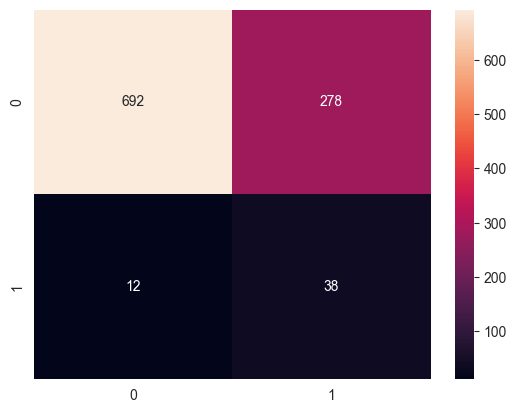

<IPython.core.display.Javascript object>

In [108]:
svc = SVC(class_weight='balanced', random_state=42)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf', 'poly'],  
    'gamma': ['scale', 'auto', 0.1, 1.0], 
    'degree': [2, 3, 4], 
}
gs_svc = GridSearchCV(svc, param_grid, 
                      scoring=fbeta_scorer, 
                      cv=5, verbose=True, 
                      n_jobs=-1)
gs_svc.fit(X_train_preprocessed, y_train)
print(gs_svc.best_params_)
y_pred = gs_svc.predict(X_test_preprocessed)
print("Recall:", recall_score(y_test, y_pred))
fbeta = fbeta_score(y_test, y_pred, beta=3)
print(f"F-beta({3}) Score: {fbeta:.3f}")
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f')
plt.show()

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'C': 0.001, 'penalty': 'l2'}
Recall: 0.74
F-beta(3) Score: 0.499
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       970
           1       0.13      0.74      0.22        50

    accuracy                           0.74      1020
   macro avg       0.55      0.74      0.53      1020
weighted avg       0.94      0.74      0.81      1020



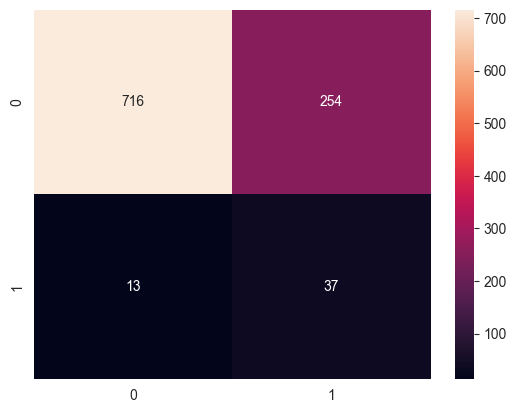

<IPython.core.display.Javascript object>

In [110]:
lr = LogisticRegression(class_weight='balanced', random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  
    'penalty': ['l1', 'l2', 'elasticnet'], 
}

gs_lr = GridSearchCV(lr, param_grid, 
                     scoring=fbeta_scorer, 
                     cv=5, verbose=True, 
                     n_jobs=-1)
gs_lr.fit(X_train_preprocessed, y_train)
print(gs_lr.best_params_)
y_pred = gs_lr.predict(X_test_preprocessed)
print("Recall:", recall_score(y_test, y_pred))
fbeta = fbeta_score(y_test, y_pred, beta=3)
print(f"F-beta({3}) Score: {fbeta:.3f}")
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f')
plt.show()

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
{'learning_rate': 0.01, 'max_depth': 5, 'min_child_samples': 10, 'n_estimators': 200, 'num_leaves': 5}
Recall: 0.76
F-beta(3) Score: 0.517
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       970
           1       0.13      0.76      0.23        50

    accuracy                           0.75      1020
   macro avg       0.56      0.75      0.54      1020
weighted avg       0.94      0.75      0.82      1020



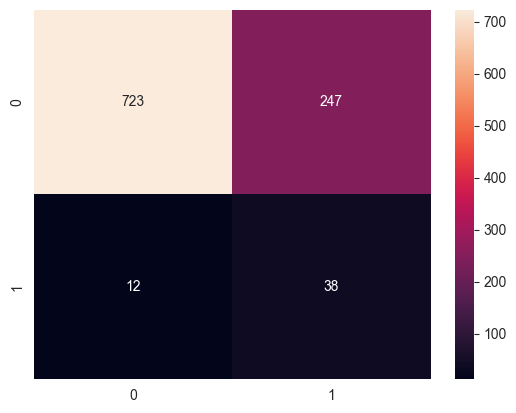

<IPython.core.display.Javascript object>

In [111]:
lgbm = LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'num_leaves': [5, 10, 20, 30],
    'max_depth': [3, 5, 7],
    'min_child_samples': [1, 5, 10]
}

gs_lgbm = GridSearchCV(lgbm, param_grid, 
                       scoring=fbeta_scorer, 
                       cv=5, verbose=True, 
                       n_jobs=-1)
gs_lgbm.fit(X_train_preprocessed, y_train)
print(gs_lgbm.best_params_)
y_pred = gs_lgbm.predict(X_test_preprocessed)
print("Recall:", recall_score(y_test, y_pred))
fbeta = fbeta_score(y_test, y_pred, beta=3)
print(f"F-beta({3}) Score: {fbeta:.3f}")
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f')
plt.show()

Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Recall: 0.74
F-beta(3) Score: 0.510
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       970
           1       0.13      0.74      0.23        50

    accuracy                           0.75      1020
   macro avg       0.56      0.75      0.54      1020
weighted avg       0.94      0.75      0.82      1020



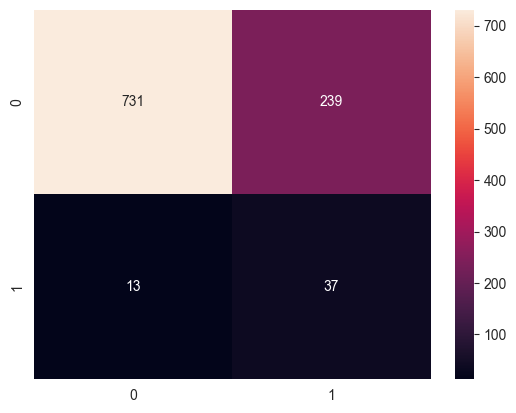

<IPython.core.display.Javascript object>

In [112]:
rf = RandomForestClassifier(class_weight='balanced_subsample', 
                            random_state=42)
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 7, 10],
    'n_estimators': [50, 100, 200, 300],
}

gs_rf = GridSearchCV(rf, param_grid, 
                     scoring=fbeta_scorer, 
                     cv=5, verbose=True, 
                     n_jobs=-1)
gs_rf.fit(X_train_preprocessed, y_train)
print(gs_rf.best_params_)
y_pred = gs_rf.predict(X_test_preprocessed)
print("Recall:", recall_score(y_test, y_pred))
fbeta = fbeta_score(y_test, y_pred, beta=3)
print(f"F-beta({3}) Score: {fbeta:.3f}")
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f')
plt.show()

- LGBMClassifier seems to work the best in regards to F-3 score (higher emphasis on recall). Let's try the SMOTE-ENN resampling technique to tackle the data imbalance and check whether it improves the score:

{'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__min_child_samples': 1, 'classifier__n_estimators': 100}
Recall: 0.74
F-beta(3) Score: 0.497
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       970
           1       0.13      0.74      0.22        50

    accuracy                           0.74      1020
   macro avg       0.55      0.74      0.53      1020
weighted avg       0.94      0.74      0.81      1020



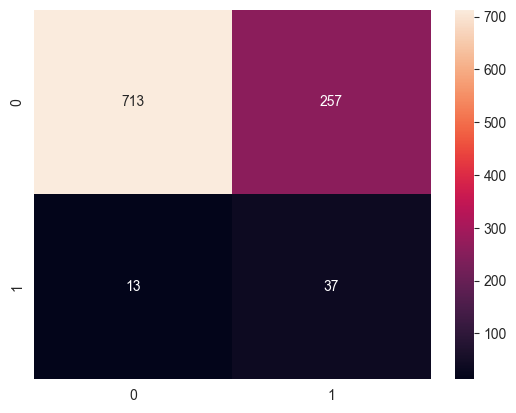

<IPython.core.display.Javascript object>

In [123]:
lgbm = LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1)
lgbm_imb_pipeline = get_imb_pipeline(lgbm)
stratified_kfold = StratifiedKFold(n_splits=5,
                                   shuffle=True,
                                   random_state=42)
param_grid_lgbm = {
    'classifier__learning_rate': [0.001, 0.01, 0.1, 0.5],
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__max_depth': [2, 3, 5, 7, -1],
    'classifier__min_child_samples': [1, 5, 10]
}

gs_lgbm_imb = GridSearchCV(estimator=lgbm_imb_pipeline,
                           param_grid=param_grid_lgbm,
                           scoring=fbeta_scorer,
                           cv=stratified_kfold,
                           n_jobs=-1)

gs_lgbm_imb.fit(X_train_preprocessed, y_train)
print(gs_lgbm_imb.best_params_)
y_pred = gs_lgbm_imb.predict(X_test_preprocessed)
print("Recall:", recall_score(y_test, y_pred))
fbeta = fbeta_score(y_test, y_pred, beta=3)
print(f"F-beta({3}) Score: {fbeta:.3f}")
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f')
plt.show()

The SMOTE-ENN resampling technique doesn't improve the F-3 score or Recall itself, so we will stick to the original data.

#### Ensembled models

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Recall: 0.0
F-beta(3) Score: 0.000
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       970
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1020
   macro avg       0.48      0.50      0.49      1020
weighted avg       0.90      0.95      0.93      1020



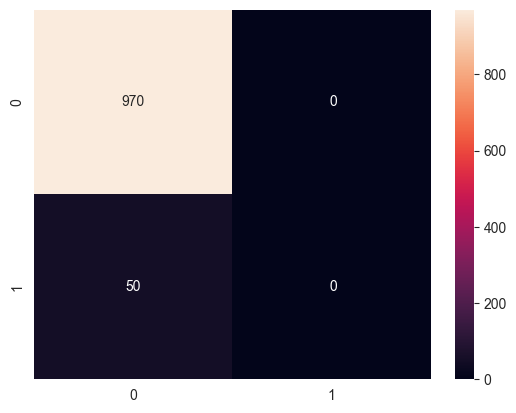

<IPython.core.display.Javascript object>

In [118]:
log_reg = LogisticRegression(**gs_lr.best_params_)
svc = SVC(**gs_svc.best_params_, probability=True)
rf = RandomForestClassifier(**gs_rf.best_params_)
lgbm = LGBMClassifier(**gs_lgbm.best_params_, verbose=-1)

voting_model = VotingClassifier(
    estimators=[('lr', log_reg), 
                ('svm', svc), 
                ('rf', rf),
                ('lgbm', lgbm)],
    voting='soft'
)

param_grid = {
    'weights': [(1, 1, 1, 1), (2, 3, 1, 1), (1, 2, 3, 1)]
}

grid_search_voter = GridSearchCV(estimator=voting_model, 
                                 param_grid=param_grid, 
                                 scoring=fbeta_scorer,
                                 cv=5, verbose=True, 
                                 n_jobs=-1)

grid_search_voter.fit(X_train_preprocessed, y_train)

best_weights = grid_search_voter.best_params_['weights']
voting_model.set_params(weights=best_weights)

voting_model.fit(X_train_preprocessed, y_train)
preds = voting_model.predict(X_test_preprocessed)
print("Recall:", recall_score(y_test, preds))
fbeta = fbeta_score(y_test, preds, beta=3)
print(f"F-beta(3) Score: {fbeta:.3f}")
class_report = classification_report(y_test, preds)
print("Classification Report:\n", class_report)

sns.heatmap(confusion_matrix(y_test,preds),annot=True,fmt='2.0f')
plt.show()

- The accuracy of the voting classifier is good, but the recall is terrible. Let's try SMOTE technique to tackle class imbalance and try the voting classifier again:

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Recall: 0.72
F-beta(3) Score: 0.500
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.86       970
           1       0.13      0.72      0.23        50

    accuracy                           0.76      1020
   macro avg       0.56      0.74      0.54      1020
weighted avg       0.94      0.76      0.82      1020



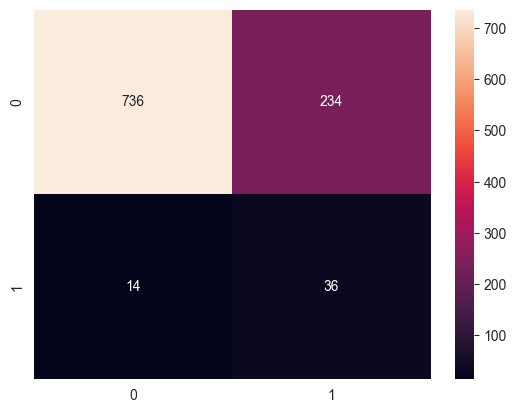

<IPython.core.display.Javascript object>

In [120]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

log_reg = LogisticRegression(**gs_lr.best_params_)
svc = SVC(**gs_svc.best_params_, probability=True)
rf = RandomForestClassifier(**gs_rf.best_params_)
lgbm = LGBMClassifier(**gs_lgbm.best_params_, verbose=-1)

voting_model = VotingClassifier(
    estimators=[('lr', log_reg), 
                ('svm', svc), 
                ('rf', rf),
                ('lgbm', lgbm)],
    voting='soft'
)

param_grid = {
    'weights': [(1, 1, 1, 1), (2, 3, 1, 1), (1, 2, 3, 1)]
}

grid_search_voter = GridSearchCV(estimator=voting_model, 
                                 param_grid=param_grid, 
                                 scoring=fbeta_scorer,
                                 cv=5, verbose=True, 
                                 n_jobs=-1)

grid_search_voter.fit(X_train_resampled, y_train_resampled)

best_weights = grid_search_voter.best_params_['weights']
voting_model.set_params(weights=best_weights)

voting_model.fit(X_train_resampled, y_train_resampled)
preds = voting_model.predict(X_test_preprocessed)
print("Recall:", recall_score(y_test, preds))
fbeta = fbeta_score(y_test, preds, beta=3)
print(f"F-beta(3) Score: {fbeta:.3f}")
class_report = classification_report(y_test, preds)
print("Classification Report:\n", class_report)

sns.heatmap(confusion_matrix(y_test,preds),annot=True,fmt='2.0f')
plt.show()

- The result is better, but models used in the voting classifier work better on their own.

#### Explaining the model

Because of using a different encoding mechanism during earlier steps, we lost the feature names, which is cruicial for explaining the model. We will refit the best performing model.

In [297]:
X_train[cat_features] = X_train[cat_features].astype('category')
X_test[cat_features] = X_test[cat_features].astype('category')

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
{'learning_rate': 0.01, 'max_depth': 5, 'min_child_samples': 5, 'n_estimators': 200, 'num_leaves': 10}
Recall: 0.74
F-beta(3) Score: 0.529
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87       970
           1       0.15      0.74      0.25        50

    accuracy                           0.78      1020
   macro avg       0.57      0.76      0.56      1020
weighted avg       0.94      0.78      0.84      1020



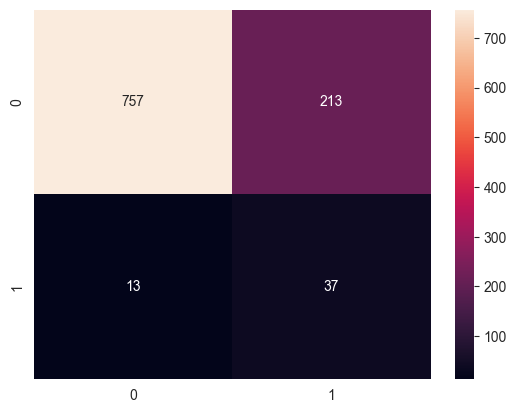

<IPython.core.display.Javascript object>

In [298]:
lgbm = LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'num_leaves': [5, 10, 20, 30],
    'max_depth': [3, 5, 7],
    'min_child_samples': [1, 5, 10]
}

gs_lgbm = GridSearchCV(lgbm, param_grid, 
                       scoring=fbeta_scorer, 
                       cv=5, verbose=True, 
                       n_jobs=-1)
gs_lgbm.fit(X_train, y_train)
print(gs_lgbm.best_params_)
y_pred = gs_lgbm.predict(X_test)
print("Recall:", recall_score(y_test, y_pred))
fbeta = fbeta_score(y_test, y_pred, beta=3)
print(f"F-beta({3}) Score: {fbeta:.3f}")
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 618
[LightGBM] [Info] Number of data points in the train set: 4079, number of used features: 10
[LightGBM] [Info] Start training from score 0.048786


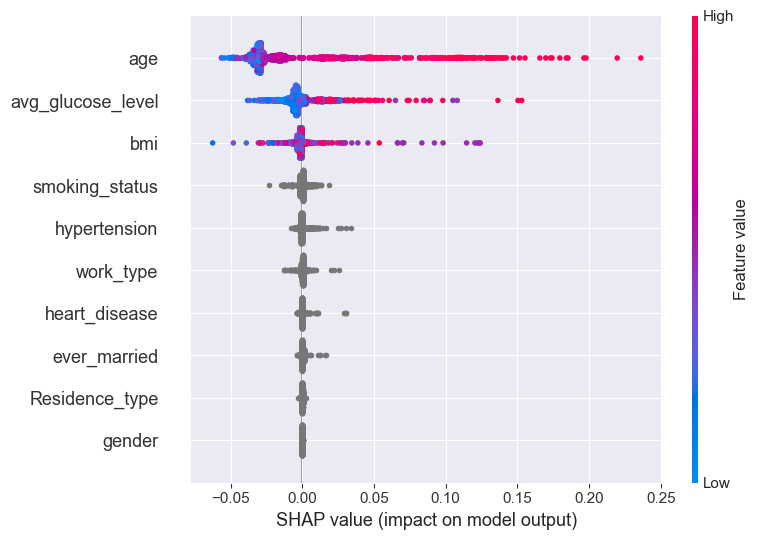

<IPython.core.display.Javascript object>

In [344]:
d_train = lgb.Dataset(X_train, label=y_train, categorical_feature='auto')

params = gs_lgbm.best_params_

model = lgb.train(params, d_train)

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns.tolist())

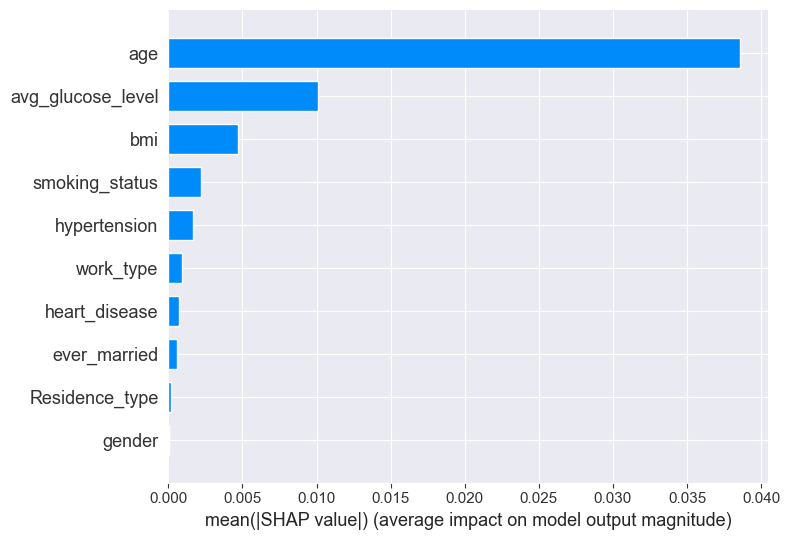

<IPython.core.display.Javascript object>

In [345]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [346]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_test.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
1,age,0.038561
7,avg_glucose_level,0.010127
8,bmi,0.004689
9,smoking_status,0.002218
2,hypertension,0.001694
5,work_type,0.000913
3,heart_disease,0.000715
4,ever_married,0.00057
6,Residence_type,0.000154
0,gender,0.000014


<IPython.core.display.Javascript object>

- The top-5 features that influence the model prediction are:
    - age
    - avg_glucose_level
    - bmi
    - smoking_status
    - hypertension 

Let's look into dependence plots of the top-5 features:

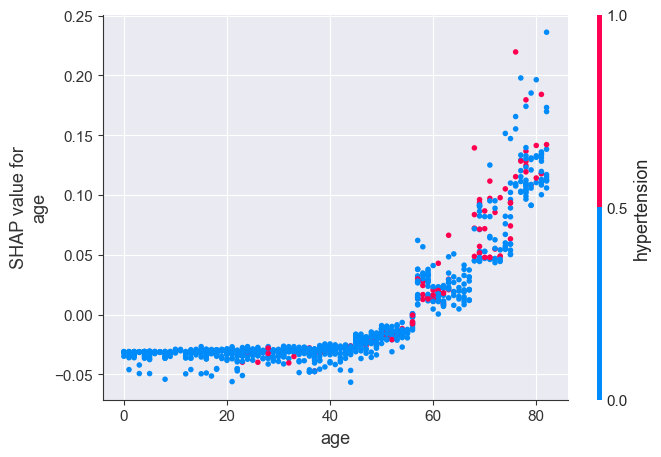

<IPython.core.display.Javascript object>

In [283]:
shap.dependence_plot('age', shap_values, X_test, 
                     interaction_index='hypertension')

- After the age of 40 there seems to be a stronger association between the age and the likelihood of having a stroke.

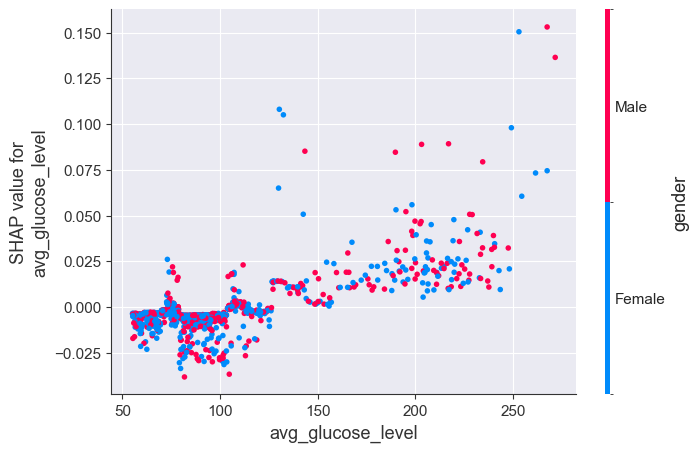

<IPython.core.display.Javascript object>

In [278]:
shap.dependence_plot('avg_glucose_level', shap_values, X_test, 
                     interaction_index='gender')

- In generall, higher avg glucose level is associated with a higher risk of stroke. 

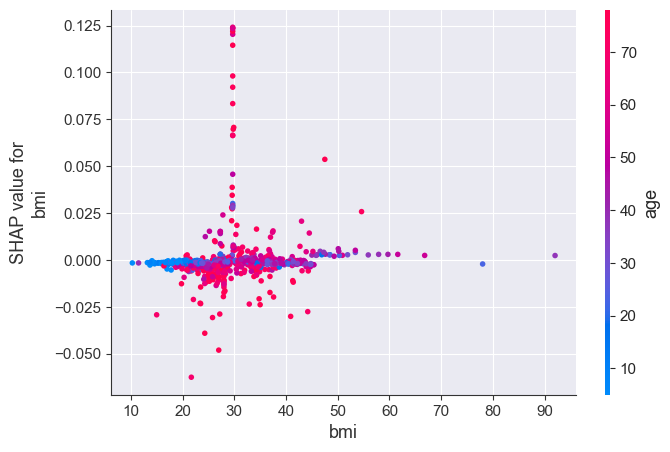

<IPython.core.display.Javascript object>

In [288]:
shap.dependence_plot('bmi', shap_values, X_test, 
                     interaction_index='age')

- There is a peak at BMI 30 which is associated with a higher risk of stroke. It should be noted that BMI of 30 and above is considered as obesity for an average person. The peak at BMI 30 may be associated with some other features, including age (it seems like there are mostly elderly people at this peak).

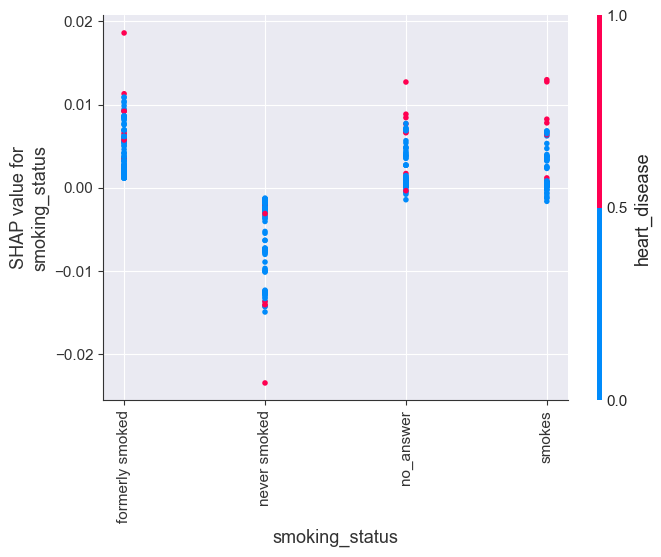

<IPython.core.display.Javascript object>

In [284]:
shap.dependence_plot('smoking_status', shap_values, X_test, 
                     interaction_index='heart_disease')

- The model tends to give higher stroke predictions to people who smoke or formerly smoked, and also to patients for whom the smoking status is unknown.

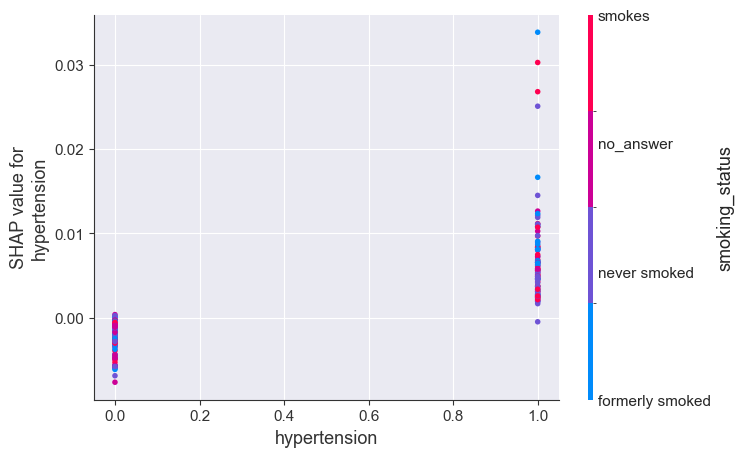

<IPython.core.display.Javascript object>

In [294]:
shap.dependence_plot('hypertension', shap_values, X_test, 
                     interaction_index='smoking_status')

- Patients with hypertension seems to have a higher risk of stroke in the model.

#### Web App with the Trained Model

In [347]:
from joblib import dump

<IPython.core.display.Javascript object>

Recall: 0.74
F-beta(3) Score: 0.529
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87       970
           1       0.15      0.74      0.25        50

    accuracy                           0.78      1020
   macro avg       0.57      0.76      0.56      1020
weighted avg       0.94      0.78      0.84      1020



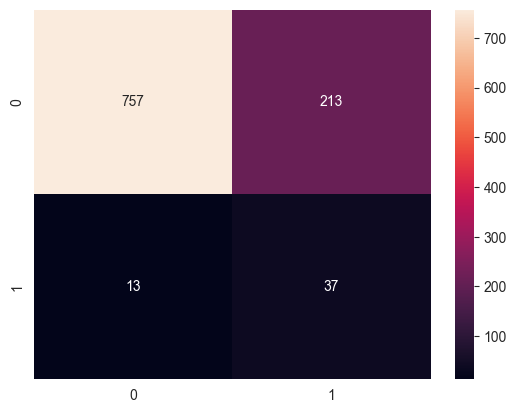

<IPython.core.display.Javascript object>

In [356]:
model = LGBMClassifier(**gs_lgbm.best_params_, class_weight='balanced', 
                       random_state=42, verbose=-1)
model.fit(X_train, y_train, categorical_feature = 'auto',
          eval_set=(X_test, y_test),
          feature_name='auto')

y_pred = model.predict(X_test)
print("Recall:", recall_score(y_test, y_pred))
fbeta = fbeta_score(y_test, y_pred, beta=3)
print(f"F-beta({3}) Score: {fbeta:.3f}")
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f')
plt.show()

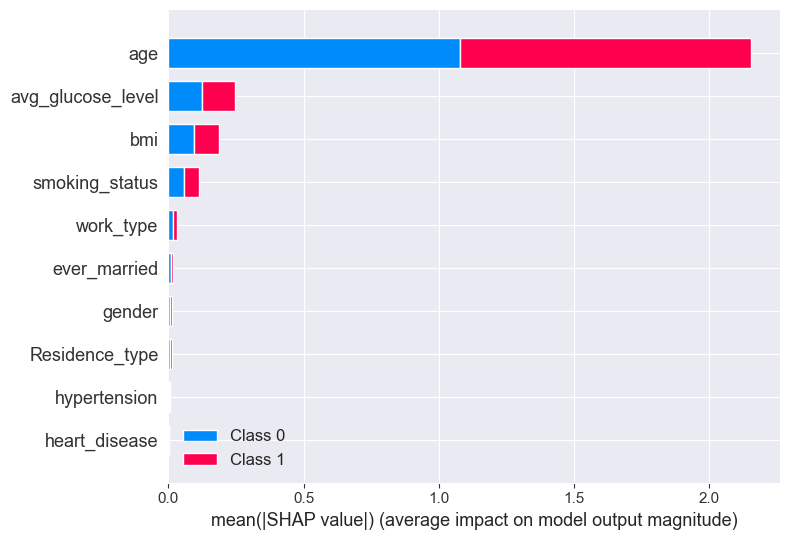

<IPython.core.display.Javascript object>

In [357]:
explainerlgbmc = shap.TreeExplainer(model)
shap_values_LightGBM_test = explainerlgbmc.shap_values(X_test)
shap_values_LightGBM_train = explainerlgbmc.shap_values(X_train)
shap.summary_plot(shap_values_LightGBM_train, X_train, plot_type="bar")

In [349]:
dump(model, 'stroke_classifier.joblib')

['stroke_classifier.joblib']

<IPython.core.display.Javascript object>

The rest of the code for the web app is in file 'app.py'

Link to the app: https://strokepredictionml.streamlit.app/

# 4. Conclusions and Further Analysis

#### Main insights and observations:
- There is a significant association between the Stroke status and hypertension status/heart disease/ever-married status/work type/smoking status/age group/bmi group/avg glucose group.
- There is a significant difference between the median age, bmi, and avg glucose level of people who have had a stroke.
- The 95% confidence interval for people who had a stroke are:
    - Age: 66-69y.o.
    - BMI: 29.6-31
    - Avg glucose level: 124.8-140.2 mg/dL
- After the age of 40 there seems to be a stronger association between the age and the likelihood of having a stroke.
- In generall, higher avg glucose level is associated with a higher risk of stroke.
- There is a higher risk of stroke for people who smoke or formerly smoked, and also to patients for whom the smoking status is unknown.
- Patients with hypertension seem to have a higher risk of stroke.


#### Recommendations:
- The patient and the doctor should be more vigilant if the patient is a smoker, is older than 40y.o., has increased BMI and average glucose level, and who suffer from hypertension.
- The model was trained on highly imbalanced data, so the doctors should use SHAP to visualize feature importances (with force plots in particular) and use their domain expertise to judge whether the person in the risk category.


#### Further Analysis:
- The performance of the model should be improved. The main focus of the model selection and tuning was F-beta(3) score which combines precision and recall (with higher emphasis on recall). We were trying to identify as many in-risk patients as possible, but also we tried to minimize the number of false positives to avoid overwhelming the doctors. We should discuss the further steps of the model improvement with domain experts and stakeholders.
- The Streamlit App in the 'app.py' file can be improved by adding SHAP visualizations.